# Cancer data analysis

## Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

## Importing required lookup tables

In [2]:
z_lookup = pd.ExcelFile('Documents/all_z_lookup_tables.xlsx')
cancer_id = pd.read_excel(z_lookup, 'zicd')
ethnicity = pd.read_excel(z_lookup, 'zethnicity')
gender = pd.read_excel(z_lookup, 'zgender')
intent = pd.read_excel(z_lookup, 'zcancercareplanintent')
vital = pd.read_excel(z_lookup,'zvitalstatus')
grade = pd.read_excel(z_lookup,'zgrade')
histology = pd.read_excel(z_lookup,'zhistologylookup')

## Importing required files

In [3]:
regimen = pd.read_csv('Data/sim_sact_regimen.csv')
patient = pd.read_csv('Data/sim_av_patient.csv')
drug_detail = pd.read_csv('Data/sim_sact_drug_detail.csv')
tumour = pd.read_csv('Data/sim_av_tumour.csv', low_memory=False)
cycle = pd.read_csv('Data/sim_sact_cycle.csv', low_memory=False)
aus_data=pd.read_excel("Data\CDiA-2022-Book-1a-Cancer-incidence-age-standardised-rates-5-year-age-groups.xlsx",sheet_name="Table S1a.1",header=5,skipfooter=19)

In [4]:
patient.isna().sum()

PATIENTID                          0
GENDER                             0
ETHNICITY                      90494
DEATHCAUSECODE_1A            1248518
DEATHCAUSECODE_1B            1700480
DEATHCAUSECODE_1C            1860963
DEATHCAUSECODE_2             1588067
DEATHCAUSECODE_UNDERLYING    1248518
DEATHLOCATIONCODE            1246675
VITALSTATUS                        0
VITALSTATUSDATE                 1843
LINKNUMBER                         0
dtype: int64

In [5]:
patient['ETHNICITY'].value_counts()

A     1525829
Z       67078
C       61672
S       20734
B       16038
H       15225
X       14812
M       12075
N        9680
J        9357
L        8989
P        5199
R        3787
G        3338
K        2849
D        1907
F        1410
E         953
0         172
8           3
CA          2
CP          1
CH          1
Name: ETHNICITY, dtype: int64

In [6]:
tumour.isna().sum()

TUMOURID                                0
GENDER                                  0
PATIENTID                               0
DIAGNOSISDATEBEST                       0
SITE_ICD10_O2_3CHAR                     0
SITE_ICD10_O2                           0
SITE_ICD10R4_O2_3CHAR_FROM2013          0
SITE_ICD10R4_O2_FROM2013                0
SITE_ICDO3REV2011                       4
SITE_ICDO3REV2011_3CHAR                 4
MORPH_ICD10_O2                          0
MORPH_ICDO3REV2011                     32
BEHAVIOUR_ICD10_O2                      0
BEHAVIOUR_ICDO3REV2011                  0
T_BEST                            1035148
N_BEST                            1135720
M_BEST                            1135603
STAGE_BEST                           1900
GRADE                                   0
AGE                                     0
CREG_CODE                               0
STAGE_BEST_SYSTEM                  770751
LATERALITY                              0
SCREENINGSTATUSFULL_CODE          

In [7]:
print(tumour.dtypes)

TUMOURID                            int64
GENDER                              int64
PATIENTID                           int64
DIAGNOSISDATEBEST                  object
SITE_ICD10_O2_3CHAR                object
SITE_ICD10_O2                      object
SITE_ICD10R4_O2_3CHAR_FROM2013     object
SITE_ICD10R4_O2_FROM2013           object
SITE_ICDO3REV2011                  object
SITE_ICDO3REV2011_3CHAR            object
MORPH_ICD10_O2                      int64
MORPH_ICDO3REV2011                float64
BEHAVIOUR_ICD10_O2                  int64
BEHAVIOUR_ICDO3REV2011              int64
T_BEST                             object
N_BEST                             object
M_BEST                             object
STAGE_BEST                         object
GRADE                              object
AGE                                 int64
CREG_CODE                          object
STAGE_BEST_SYSTEM                  object
LATERALITY                         object
SCREENINGSTATUSFULL_CODE          

In [8]:
print(patient.dtypes)

PATIENTID                     int64
GENDER                        int64
ETHNICITY                    object
DEATHCAUSECODE_1A            object
DEATHCAUSECODE_1B            object
DEATHCAUSECODE_1C            object
DEATHCAUSECODE_2             object
DEATHCAUSECODE_UNDERLYING    object
DEATHLOCATIONCODE            object
VITALSTATUS                  object
VITALSTATUSDATE              object
LINKNUMBER                    int64
dtype: object


In [9]:
aus_data=aus_data.loc[aus_data['Year'].isin([2016,2017,2018,2019])]
aus_data

,Data type,Cancer group/site,Year,Sex,Age group (years),Count,"Age-specific rate\n(per 100,000)","Age-standardised rate\n(Aust.) (per 100,000)","Age-standardised rate\n (WHO) (per 100,000)","Age-standardised rate\n (Segi) (per 100,000)",Unnamed: 10,ICD10 codes
680,Actual,Acute lymphoblastic leukaemia,2016,Males,00–04,56,6.9,. .,. .,. .,,C91.0
681,Actual,Acute lymphoblastic leukaemia,2016,Males,05–09,30,3.7,. .,. .,. .,,C91.0
682,Actual,Acute lymphoblastic leukaemia,2016,Males,10–14,15,2.0,. .,. .,. .,,C91.0
683,Actual,Acute lymphoblastic leukaemia,2016,Males,15–19,21,2.8,. .,. .,. .,,C91.0
684,Actual,Acute lymphoblastic leukaemia,2016,Males,20–24,6,0.7,. .,. .,. .,,C91.0
...,...,...,...,...,...,...,...,...,...,...,...,...
207935,Projections,Vulvar cancer,2019,Persons,75–79,41,5.6,. .,. .,. .,,C51
207936,Projections,Vulvar cancer,2019,Persons,80–84,44,8.7,. .,. .,. .,,C51
207937,Projections,Vulvar cancer,2019,Persons,85–89,41,13.1,. .,. .,. .,,C51
207938,Projections,Vulvar cancer,2019,Persons,90+,25,12.4,. .,. .,. .,,C51


In [10]:
aus_data['Age group (years)'].value_counts()

00–04                1068
05–09                1068
90+                  1068
85–89                1068
80–84                1068
75–79                1068
70–74                1068
65–69                1068
60–64                1068
55–59                1068
50–54                1068
45–49                1068
40–44                1068
35–39                1068
30–34                1068
25–29                1068
20–24                1068
15–19                1068
10–14                1068
All ages combined    1068
Name: Age group (years), dtype: int64

In [11]:
aus_data = aus_data[aus_data['Age group (years)'] != "All ages combined"]
aus_data['Age group (years)'].value_counts()

00–04    1068
50–54    1068
85–89    1068
80–84    1068
75–79    1068
70–74    1068
65–69    1068
60–64    1068
55–59    1068
45–49    1068
05–09    1068
40–44    1068
35–39    1068
30–34    1068
25–29    1068
20–24    1068
15–19    1068
10–14    1068
90+      1068
Name: Age group (years), dtype: int64

In [12]:
aus_data

,Data type,Cancer group/site,Year,Sex,Age group (years),Count,"Age-specific rate\n(per 100,000)","Age-standardised rate\n(Aust.) (per 100,000)","Age-standardised rate\n (WHO) (per 100,000)","Age-standardised rate\n (Segi) (per 100,000)",Unnamed: 10,ICD10 codes
680,Actual,Acute lymphoblastic leukaemia,2016,Males,00–04,56,6.9,. .,. .,. .,,C91.0
681,Actual,Acute lymphoblastic leukaemia,2016,Males,05–09,30,3.7,. .,. .,. .,,C91.0
682,Actual,Acute lymphoblastic leukaemia,2016,Males,10–14,15,2.0,. .,. .,. .,,C91.0
683,Actual,Acute lymphoblastic leukaemia,2016,Males,15–19,21,2.8,. .,. .,. .,,C91.0
684,Actual,Acute lymphoblastic leukaemia,2016,Males,20–24,6,0.7,. .,. .,. .,,C91.0
...,...,...,...,...,...,...,...,...,...,...,...,...
207934,Projections,Vulvar cancer,2019,Persons,70–74,52,4.9,. .,. .,. .,,C51
207935,Projections,Vulvar cancer,2019,Persons,75–79,41,5.6,. .,. .,. .,,C51
207936,Projections,Vulvar cancer,2019,Persons,80–84,44,8.7,. .,. .,. .,,C51
207937,Projections,Vulvar cancer,2019,Persons,85–89,41,13.1,. .,. .,. .,,C51


In [13]:
aus_data['Data type'].value_counts()

Actual         15276
Projections     5016
Name: Data type, dtype: int64

In [14]:
aus_data = aus_data[aus_data['Data type'] != "Projections"]
aus_data = aus_data[aus_data['Sex'] != "Persons"]
aus_data['Data type'].value_counts()

Actual    9918
Name: Data type, dtype: int64

In [15]:
aus_data['Sex'].value_counts()

Females    5130
Males      4788
Name: Sex, dtype: int64

In [16]:
aus_data

,Data type,Cancer group/site,Year,Sex,Age group (years),Count,"Age-specific rate\n(per 100,000)","Age-standardised rate\n(Aust.) (per 100,000)","Age-standardised rate\n (WHO) (per 100,000)","Age-standardised rate\n (Segi) (per 100,000)",Unnamed: 10,ICD10 codes
680,Actual,Acute lymphoblastic leukaemia,2016,Males,00–04,56,6.9,. .,. .,. .,,C91.0
681,Actual,Acute lymphoblastic leukaemia,2016,Males,05–09,30,3.7,. .,. .,. .,,C91.0
682,Actual,Acute lymphoblastic leukaemia,2016,Males,10–14,15,2.0,. .,. .,. .,,C91.0
683,Actual,Acute lymphoblastic leukaemia,2016,Males,15–19,21,2.8,. .,. .,. .,,C91.0
684,Actual,Acute lymphoblastic leukaemia,2016,Males,20–24,6,0.7,. .,. .,. .,,C91.0
...,...,...,...,...,...,...,...,...,...,...,...,...
207094,Actual,Vulvar cancer,2018,Females,70–74,37,7.1,. .,. .,. .,,C51
207095,Actual,Vulvar cancer,2018,Females,75–79,53,14.5,. .,. .,. .,,C51
207096,Actual,Vulvar cancer,2018,Females,80–84,37,13.8,. .,. .,. .,,C51
207097,Actual,Vulvar cancer,2018,Females,85–89,26,14.2,. .,. .,. .,,C51


## Converting 'Age' column into 'Age groups'

In [17]:
tumour['AGE']

0          84
1          67
2          79
3          76
4          49
           ..
1995565    70
1995566    59
1995567    59
1995568    75
1995569    75
Name: AGE, Length: 1995570, dtype: int64

In [18]:
tumour['Age group (years)']=pd.cut(tumour['AGE'],bins=[0,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89,115],right=False, labels=['00–04','05–09','10–14','15–19','20–24','25–29','30–34','35–39','40–44','45–49','50–54','55–59','60–64','65–69','70–74','75–79','80–84','85–89','90+'])
tumour['Age group (years)']

0          85–89
1          65–69
2          80–84
3          75–79
4          50–54
           ...  
1995565    70–74
1995566    60–64
1995567    60–64
1995568    75–79
1995569    75–79
Name: Age group (years), Length: 1995570, dtype: category
Categories (19, object): ['00–04' < '05–09' < '10–14' < '15–19' ... '75–79' < '80–84' < '85–89' < '90+']

In [19]:
tumour['Age group (years)'].value_counts()

70–74    298482
75–79    268292
80–84    235464
65–69    233639
60–64    177479
85–89    166754
55–59    144481
50–54    109313
90+      105451
45–49     71360
40–44     45114
25–29     42446
30–34     41661
35–39     40514
20–24      5637
15–19      2905
00–04      2609
05–09      2110
10–14      1859
Name: Age group (years), dtype: int64

In [20]:
a_req_age_1=aus_data.groupby('Age group (years)')['Count'].sum()
a_req_age_1

Age group (years)
00–04      3190
05–09      1944
10–14      2067
15–19      3912
20–24      5836
25–29      9367
30–34     15327
35–39     20141
40–44     29822
45–49     47893
50–54     68848
55–59     97594
60–64    124723
65–69    152578
70–74    153658
75–79    125059
80–84     97364
85–89     66657
90+       36296
Name: Count, dtype: int64

## Converting 'Gender' column based on lookup table

In [21]:
tumour['GENDER'].value_counts()

2    1003101
1     992467
9          2
Name: GENDER, dtype: int64

In [22]:
patient['GENDER'] = patient['GENDER'].map(gender.set_index('Code')['Description'])

In [23]:
tumour['GENDER'] = tumour['GENDER'].map(gender.set_index('Code')['Description'])

In [24]:
tumour = tumour[tumour['GENDER'] != "Indeterminate (Unable to be classified as either male or female)"]

In [25]:
patient = patient[patient['GENDER'] != "Indeterminate (Unable to be classified as either male or female)"]

In [26]:
tumour['GENDER'].value_counts()

Female    1003101
Male       992467
Name: GENDER, dtype: int64

In [27]:
patient['GENDER'].value_counts()

Female    942065
Male      929538
Name: GENDER, dtype: int64

In [28]:
patient

,PATIENTID,GENDER,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
0,10000001,Male,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101610884
1,10000002,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101343783
2,10000003,Female,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101560124
3,10000004,Male,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101833580
4,10000005,Male,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,100957799
...,...,...,...,...,...,...,...,...,...,...,...,...
1871600,250002539,Female,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,100642102
1871601,250002540,Female,L,NaN,NaN,NaN,NaN,NaN,NaN,D,2021-06-10,101223249
1871602,250002541,Female,A,C439,NaN,NaN,NaN,I259,4,D,2022-06-10,100870402
1871603,250002542,Male,A,C66,NaN,NaN,"I259,J449,I10",C66,2,D,2019-09-25,100803641


In [29]:
tumour

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,MORPH_ICD10_O2,MORPH_ICDO3REV2011,BEHAVIOUR_ICD10_O2,BEHAVIOUR_ICDO3REV2011,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,STAGE_BEST_SYSTEM,LATERALITY,SCREENINGSTATUSFULL_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,QUINTILE_2019,DATE_FIRST_SURGERY,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CHRL_TOT_27_03,COMORBIDITIES_27_03,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,Age group (years)
0,10399610,Male,10000001,2017-03-31,C44,C444,C44,C444,C444,C44,8070,8070.0,3,3,NaN,NaN,NaN,?,G3,84,L1201,NaN,9,NaN,NaN,NaN,NaN,4,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,85–89
1,10694862,Male,10000002,2016-01-14,C44,C449,C44,C449,C449,C44,8090,8090.0,3,3,NaN,NaN,NaN,?,GX,67,L1701,NaN,9,NaN,NaN,NaN,NaN,5 - least deprived,2016-01-14,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,65–69
2,11938715,Female,10000003,2018-12-10,C44,C442,C44,C442,C442,C44,8070,8070.0,3,3,NaN,NaN,NaN,?,G2,79,L0801,UICC 8,R,NaN,NaN,NaN,NaN,3,2018-12-10,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,80–84
3,11869010,Male,10000004,2018-04-05,C44,C449,C44,C449,C449,C44,8090,8090.0,3,3,NaN,NaN,NaN,?,GX,76,L0801,NaN,9,NaN,NaN,NaN,NaN,4,NaN,C,0.0,1.0,06,NaN,NaN,NaN,NaN,75–79
4,11037077,Male,10000005,2018-04-23,C44,C446,C44,C446,C446,C44,8070,8070.0,3,3,1,NaN,NaN,?,G2,49,L1001,UICC 8,L,NaN,NaN,NaN,NaN,3,2018-04-23,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,50–54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,11848292,Male,250002429,2018-01-23,C64,C64,C64,C64,C669,C66,8210,8120.0,3,3,NaN,NaN,NaN,?,G2,70,L1001,UICC 7,9,NaN,NaN,NaN,NaN,2,NaN,C,NaN,0.0,NaN,NaN,NaN,NaN,NaN,70–74
1995566,11802787,Male,250002512,2019-02-05,C61,C61,C61,C61,C619,C61,8140,8140.0,3,3,2c,NaN,NaN,?,GX,59,L1001,NaN,9,NaN,NaN,NaN,NaN,1 - most deprived,2019-02-05,NaN,NaN,3.0,"04,13",3.0,4.0,NaN,7.0,60–64
1995567,11070198,Male,250000217,2018-11-30,C73,C73,C73,C73,C659,C65,8140,8140.0,3,3,2,0,0,1,GX,59,L0201,UICC 8,R,NaN,NaN,NaN,NaN,1 - most deprived,2018-11-30,NaN,NaN,2.0,13,NaN,NaN,NaN,NaN,60–64
1995568,10795064,Male,250001761,2018-03-19,C66,C66,C66,C66,C341,C34,8120,8170.0,3,3,3,0,0,3,G3,75,L0401,UICC 8,9,NaN,NaN,NaN,NaN,5 - least deprived,2018-03-19,9,NaN,2.0,"01,09",NaN,NaN,NaN,NaN,75–79


## Converting 'Ethnicity' column based on lookup table

In [30]:
patient['ETHNICITY'] = patient['ETHNICITY'].map(ethnicity.set_index('Code')['Description'])

In [31]:
patient['ETHNICITY'].value_counts()

WHITE BRITISH                    1525829
NOT STATED                         67076
C ANY OTHER WHITE BACKGROUND       61672
S ANY OTHER ETHNIC GROUP           20734
WHITE IRISH                        16038
ASIAN INDIAN                       15225
X NOT KNOWN                        14812
BLACK CARIBBEAN                    12075
BLACK AFRICAN                       9680
ASIAN PAKISTANI                     9357
L ANY OTHER ASIAN BACKGROUND        8989
P ANY OTHER BLACK BACKGROUND        5199
CHINESE                             3787
G ANY OTHER MIXED BACKGROUND        3338
ASIAN BANGLADESHI                   2849
WHITE AND BLACK CARIBBEAN           1907
MIXED WHITE AND ASIAN               1410
MIXED WHITE AND BLACK AFRICAN        953
WHITE                                172
8 OTHER                                3
English                                2
Polish                                 1
Turkish                                1
Name: ETHNICITY, dtype: int64

In [32]:
patient

,PATIENTID,GENDER,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
0,10000001,Male,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101610884
1,10000002,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101343783
2,10000003,Female,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101560124
3,10000004,Male,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101833580
4,10000005,Male,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,100957799
...,...,...,...,...,...,...,...,...,...,...,...,...
1871600,250002539,Female,WHITE BRITISH,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,100642102
1871601,250002540,Female,L ANY OTHER ASIAN BACKGROUND,NaN,NaN,NaN,NaN,NaN,NaN,D,2021-06-10,101223249
1871602,250002541,Female,WHITE BRITISH,C439,NaN,NaN,NaN,I259,4,D,2022-06-10,100870402
1871603,250002542,Male,WHITE BRITISH,C66,NaN,NaN,"I259,J449,I10",C66,2,D,2019-09-25,100803641


## Converting 'Cancer type' column based on lookup table

In [33]:
tumour['SITE_ICD10_O2_3CHAR'] = tumour['SITE_ICD10_O2_3CHAR'].map(cancer_id.set_index('Code')['Description'])

In [34]:
tumour['SITE_ICD10_O2_3CHAR'].value_counts().head(10)

MALIGNANT NEOPLASM OF SKIN                           514517
MALIGNANT NEOPLASM OF BREAST                         187204
MALIGNANT NEOPLASM OF PROSTATE                       179478
MALIGNANT NEOPLASM OF LUNG                           156927
MALIGNANT NEOPLASM OF COLON                           96229
CARCINOMA-IN-SITU OF CERVIX UTERI                     83577
MALIGNANT MELANOMA OF SKIN                            57817
NON-HODGKINS LYMPHOMA                                 48161
MALIGNANT NEOPLASM OF RECTUM                          38936
MALIGNANT NEOPLASM OF KIDNEY, EXCEPT RENAL PELVIS     38796
Name: SITE_ICD10_O2_3CHAR, dtype: int64

In [35]:
tumour

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,MORPH_ICD10_O2,MORPH_ICDO3REV2011,BEHAVIOUR_ICD10_O2,BEHAVIOUR_ICDO3REV2011,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,CREG_CODE,STAGE_BEST_SYSTEM,LATERALITY,SCREENINGSTATUSFULL_CODE,ER_STATUS,PR_STATUS,HER2_STATUS,QUINTILE_2019,DATE_FIRST_SURGERY,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CHRL_TOT_27_03,COMORBIDITIES_27_03,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,Age group (years)
0,10399610,Male,10000001,2017-03-31,MALIGNANT NEOPLASM OF SKIN,C444,C44,C444,C444,C44,8070,8070.0,3,3,NaN,NaN,NaN,?,G3,84,L1201,NaN,9,NaN,NaN,NaN,NaN,4,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,85–89
1,10694862,Male,10000002,2016-01-14,MALIGNANT NEOPLASM OF SKIN,C449,C44,C449,C449,C44,8090,8090.0,3,3,NaN,NaN,NaN,?,GX,67,L1701,NaN,9,NaN,NaN,NaN,NaN,5 - least deprived,2016-01-14,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,65–69
2,11938715,Female,10000003,2018-12-10,MALIGNANT NEOPLASM OF SKIN,C442,C44,C442,C442,C44,8070,8070.0,3,3,NaN,NaN,NaN,?,G2,79,L0801,UICC 8,R,NaN,NaN,NaN,NaN,3,2018-12-10,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,80–84
3,11869010,Male,10000004,2018-04-05,MALIGNANT NEOPLASM OF SKIN,C449,C44,C449,C449,C44,8090,8090.0,3,3,NaN,NaN,NaN,?,GX,76,L0801,NaN,9,NaN,NaN,NaN,NaN,4,NaN,C,0.0,1.0,06,NaN,NaN,NaN,NaN,75–79
4,11037077,Male,10000005,2018-04-23,MALIGNANT NEOPLASM OF SKIN,C446,C44,C446,C446,C44,8070,8070.0,3,3,1,NaN,NaN,?,G2,49,L1001,UICC 8,L,NaN,NaN,NaN,NaN,3,2018-04-23,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,50–54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,11848292,Male,250002429,2018-01-23,"MALIGNANT NEOPLASM OF KIDNEY, EXCEPT RENAL PELVIS",C64,C64,C64,C669,C66,8210,8120.0,3,3,NaN,NaN,NaN,?,G2,70,L1001,UICC 7,9,NaN,NaN,NaN,NaN,2,NaN,C,NaN,0.0,NaN,NaN,NaN,NaN,NaN,70–74
1995566,11802787,Male,250002512,2019-02-05,MALIGNANT NEOPLASM OF PROSTATE,C61,C61,C61,C619,C61,8140,8140.0,3,3,2c,NaN,NaN,?,GX,59,L1001,NaN,9,NaN,NaN,NaN,NaN,1 - most deprived,2019-02-05,NaN,NaN,3.0,"04,13",3.0,4.0,NaN,7.0,60–64
1995567,11070198,Male,250000217,2018-11-30,MALIGNANT NEOPLASM OF THYROID GLAND,C73,C73,C73,C659,C65,8140,8140.0,3,3,2,0,0,1,GX,59,L0201,UICC 8,R,NaN,NaN,NaN,NaN,1 - most deprived,2018-11-30,NaN,NaN,2.0,13,NaN,NaN,NaN,NaN,60–64
1995568,10795064,Male,250001761,2018-03-19,MALIGNANT NEOPLASM OF URETER,C66,C66,C66,C341,C34,8120,8170.0,3,3,3,0,0,3,G3,75,L0401,UICC 8,9,NaN,NaN,NaN,NaN,5 - least deprived,2018-03-19,9,NaN,2.0,"01,09",NaN,NaN,NaN,NaN,75–79


## Converting 'Intent of treatment' column based on lookup table

In [36]:
tumour['CANCERCAREPLANINTENT'].value_counts()

C    494220
Z    140025
9     99708
X     38120
Name: CANCERCAREPLANINTENT, dtype: int64

In [37]:
tumour['CANCERCAREPLANINTENT'] = tumour['CANCERCAREPLANINTENT'].map(intent.set_index('Code')['Description'])

In [38]:
tumour['CANCERCAREPLANINTENT'].value_counts()

Curative               494220
Non Curative           140025
Not known               99708
No active treatment     38120
Name: CANCERCAREPLANINTENT, dtype: int64

## Converting 'Vital status' column based on lookup table

In [39]:
patient['VITALSTATUS'].value_counts()

A     1232237
D      635046
X5       3007
D5        940
D4        229
X4         84
X2         45
D3         12
X           3
Name: VITALSTATUS, dtype: int64

In [40]:
patient['VITALSTATUS'] = patient['VITALSTATUS'].map(vital.set_index('Code')['Description'])

In [41]:
patient['VITALSTATUS'].value_counts()

Alive                                                              1232237
Dead                                                                635046
Lost to follow up                                                     3007
Dies before a date of trace returning alive                            940
Dies before treatment received                                         229
Trace returned as embarked but this is not yet recorded in CAS          84
This patient may have returned and has been successfully traced         45
Dies before diagnosis                                                   12
Embarked (July 2022 updated code)                                        3
Name: VITALSTATUS, dtype: int64

## Converting 'Grade' column based on lookup table

In [42]:
tumour['GRADE'].value_counts()

GX    1188434
G2     311398
G3     213420
G1     105319
G       95257
GH      46463
G4      14775
GL      12235
GI       8267
Name: GRADE, dtype: int64

In [43]:
tumour['GRADE'] = tumour['GRADE'].str.replace('G', '')

In [44]:
tumour['GRADE'] = tumour['GRADE'].map(grade.set_index('Code')['Description'])

In [45]:
tumour['GRADE'].value_counts()

X                                         1188434
2 / II / MODERATELY DIFFERENTIATED         311398
3 / III / POORLY DIFFERENTIATED            213420
1 / I / WELL DIFFERENTIATED                105319
HIGH                                        46463
4 / IV / UNDIFFERENTIATED / ANAPLASTIC      14775
LOW                                         12235
INTERMEDIATE                                 8267
Name: GRADE, dtype: int64

## Converting 'Histology' column based on lookup table

In [46]:
tumour['MORPH_ICD10_O2'].value_counts().head(10)

8090    382386
8140    377334
8070    207385
8500    168126
8000    114899
8077     83345
8743     40245
8010     28960
8520     26662
8380     24636
Name: MORPH_ICD10_O2, dtype: int64

In [47]:
tumour['MORPH_ICD10_O2']=tumour['MORPH_ICD10_O2'].astype(str) + tumour['BEHAVIOUR_ICD10_O2'].astype(str)

In [48]:
tumour['MORPH_ICD10_O2'].value_counts().head(10)

80903    382045
81403    359879
80703    202075
85003    143634
80003    107250
80772     83174
87433     32903
80103     25598
85203     24120
85002     23791
Name: MORPH_ICD10_O2, dtype: int64

In [49]:
histology['Code']=histology['MORPH_ICD10_O2 (Histology code)'].astype(str) + histology['BEHAVIOUR_ICD10 (Behaviour code)'].astype(str)

In [50]:
histology['Code'].value_counts()

80000    1
86000    1
85123    1
85202    1
85203    1
        ..
90130    1
90140    1
90150    1
90200    1
87270    1
Name: Code, Length: 844, dtype: int64

In [51]:
tumour['MORPH_ICD10_O2'] = tumour['MORPH_ICD10_O2'].map(histology.set_index('Code')['Description'])

In [52]:
tumour['MORPH_ICD10_O2'].value_counts().head(10)

BASAL CELL CARCINOMA NOS                                            382045
ADENOCARCINOMA NOS                                                  359879
SQUAMOUS CARCINOMA NOS                                              202075
DUCT INFILTRATING CARCINOMA                                         143634
NEOPLASM MALIGNANT                                                  107250
INTRAEPITHELIAL NEOPLASIA GRADE III OF CERVIX , VULVA AND VAGINA     83174
SUPERFICIAL SPREADING MELANOMA                                       32903
CARCINOMA NOS                                                        25598
CA LOBULAR NOS                                                       24120
INTRADUCTAL CA NON INFILTRATING                                      23791
Name: MORPH_ICD10_O2, dtype: int64

## Requirement 1

In [53]:
req_1_a=aus_data.groupby(['Age group (years)','Sex'])['Count'].sum()
req_1_a = req_1_a.reset_index()
pivot_data = req_1_a.pivot(index="Age group (years)", columns="Sex", values="Count")
pivot_data

Sex,Females,Males
Age group (years),,
00–04,1477,1713
05–09,917,1027
10–14,948,1119
15–19,1943,1969
20–24,2910,2926
25–29,5107,4260
30–34,9454,5873
35–39,12402,7739
40–44,18436,11386


In [54]:
plt.rcParams["figure.figsize"] = [20,10]

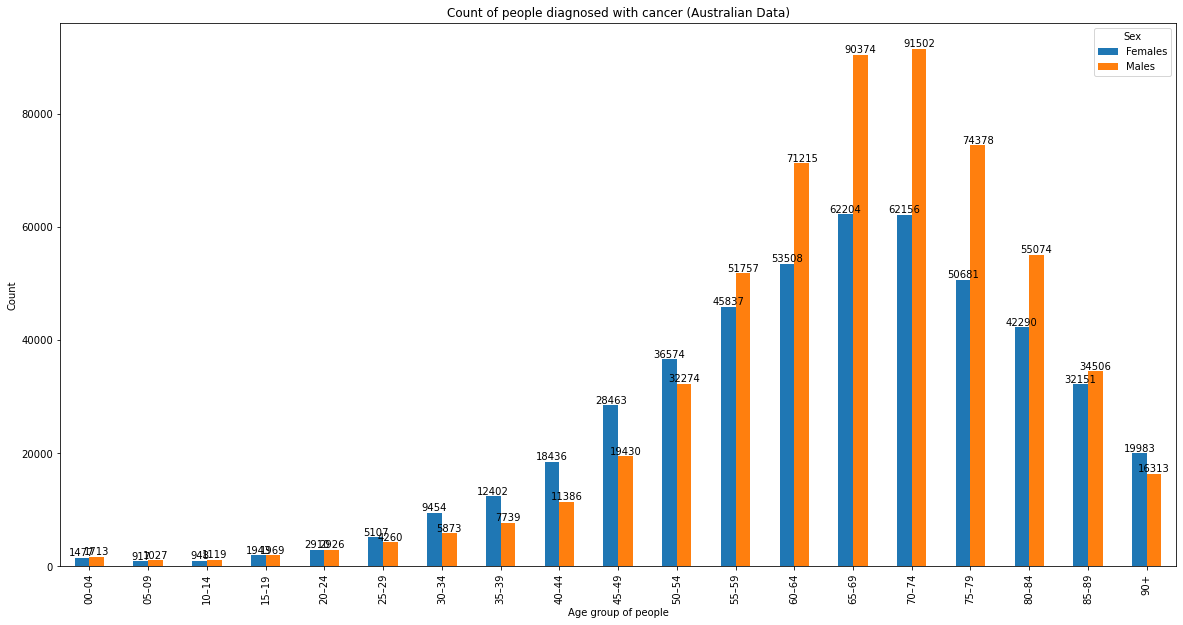

In [55]:
#Plotting the graph
# Create the chart
ax=pivot_data.plot(kind='bar')
# Set the labels and title
for i, value in enumerate(ax.patches):
    height = value.get_height()
    plt.text(value.get_x() + value.get_width() / 2, height + 1, int(height), ha='center', va='bottom')
plt.xlabel("Age group of people")
plt.ylabel("Count")
plt.title("Count of people diagnosed with cancer (Australian Data)")
#Displaying the chart
plt.show()

In [56]:
req_1=tumour.groupby(['Age group (years)','GENDER'])['TUMOURID'].count()
req_1 = req_1.reset_index()
pivot_data = req_1.pivot(index="Age group (years)", columns="GENDER")
pivot_data

TUMOURID        
GENDER              Female    Male
Age group (years)                 
00–04                 1154    1455
05–09                  911    1199
10–14                  882     977
15–19                 1395    1510
20–24                 2764    2873
25–29                31692   10754
30–34                29584   12077
35–39                26925   13589
40–44                29300   15814
45–49                44850   26510
50–54                65285   44028
55–59                77634   66847
60–64                89119   88360
65–69               110358  123281
70–74               136837  161645
75–79               119797  148495
80–84               107858  127605
85–89                77293   89461
90+                  49463   55987

In [57]:
plt.rcParams["figure.figsize"] = [20,10]

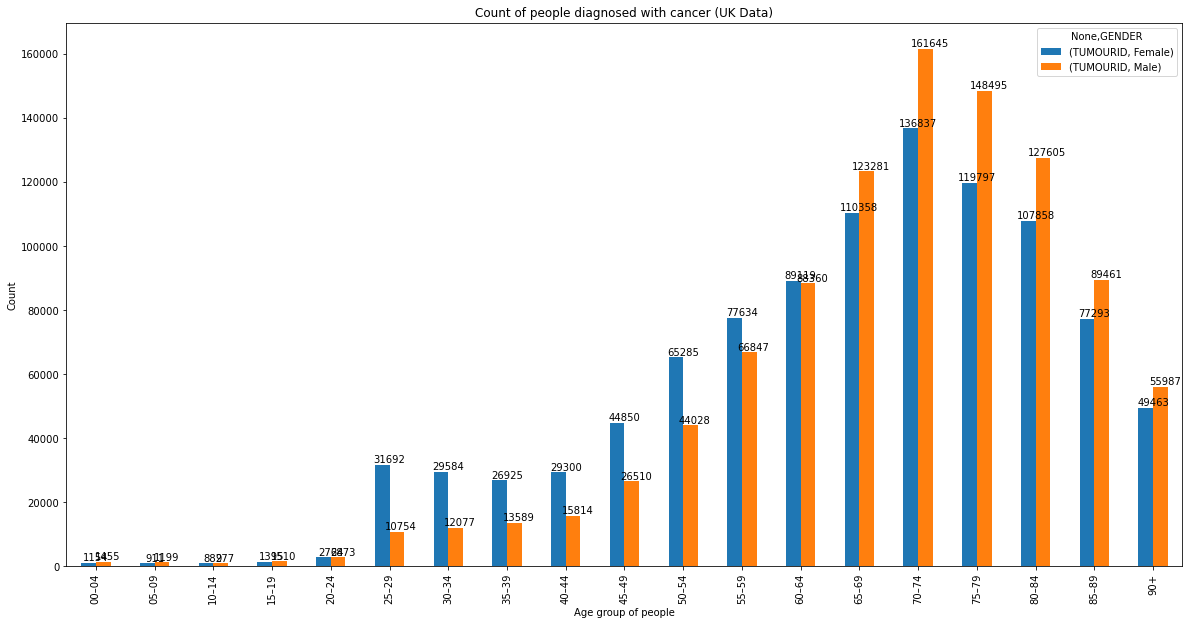

In [58]:
#Plotting the graph
# Create the chart
pivot_data.plot(kind='bar')
# Set the labels and title
for i, column in enumerate(pivot_data.columns):
    for j, value in enumerate(pivot_data[column]):
        plt.text(j + i * 0.2, value + 1, int(value), ha='center', va='bottom')
plt.xlabel("Age group of people")
plt.ylabel("Count")
plt.title("Count of people diagnosed with cancer (UK Data)")
#Displaying the chart
plt.show()

## Requirement 2

In [59]:
aus_data = aus_data[aus_data['Cancer group/site'] != "All cancers combined"]

In [60]:
req_2_a=aus_data.groupby(['Cancer group/site'])['Count'].sum()
top_10 = req_2_a.nlargest(10)
top_10

Cancer group/site
Prostate cancer               62172
Breast cancer                 54251
All blood cancers combined    48955
Colorectal cancer             46417
Melanoma of the skin          44851
Lung cancer                   38232
Colon cancer                  31800
Lymphoma                      18775
Gynaecological cancers        17874
Non-Hodgkin lymphoma          16706
Name: Count, dtype: int64

In [61]:
plt.rcParams["figure.figsize"] = [20,10]

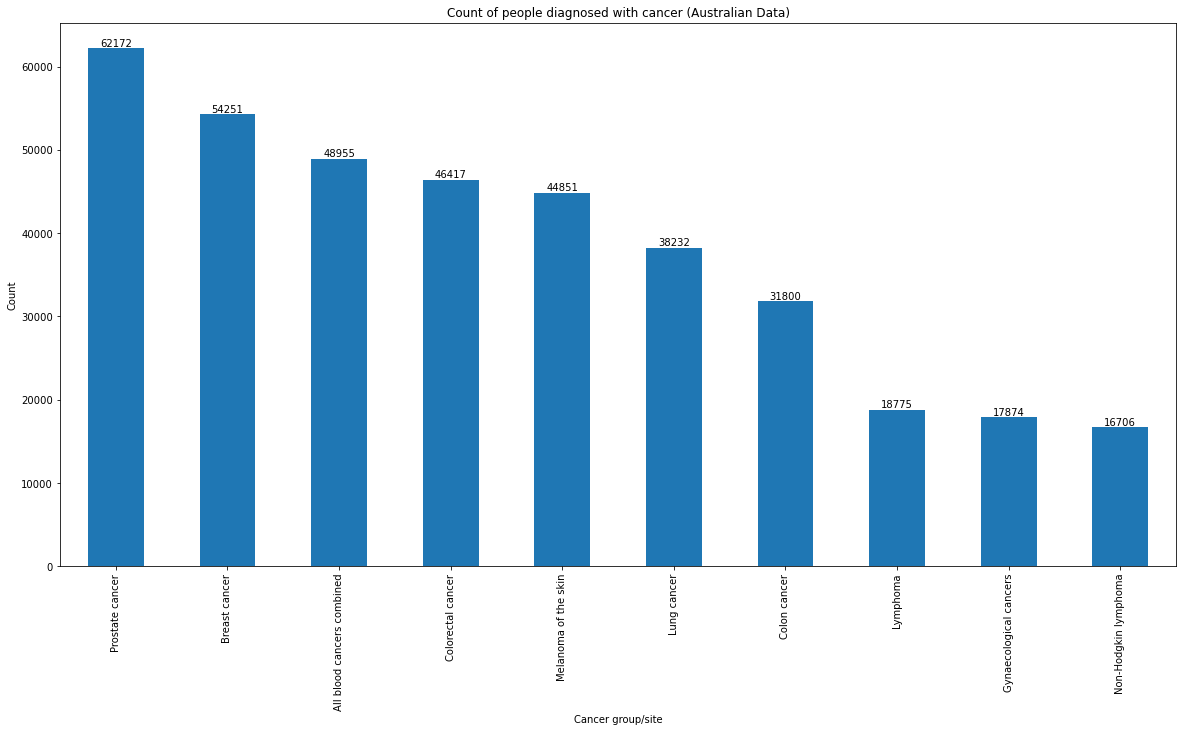

In [62]:
#Plotting the graph
# Create the chart
ax=top_10.plot(kind="bar")
for i, value in enumerate(ax.patches):
    height = value.get_height()
    plt.text(value.get_x() + value.get_width() / 2, height + 1, int(height), ha='center', va='bottom')
plt.xlabel("Cancer group/site")
plt.ylabel("Count")
plt.title("Count of people diagnosed with cancer (Australian Data)")
#Displaying the chart
plt.show()

In [63]:
cancer_counts = tumour['SITE_ICD10_O2_3CHAR'].value_counts()
req_2 = cancer_counts.sort_values(ascending=False).head(10)
req_2

MALIGNANT NEOPLASM OF SKIN                           514517
MALIGNANT NEOPLASM OF BREAST                         187204
MALIGNANT NEOPLASM OF PROSTATE                       179478
MALIGNANT NEOPLASM OF LUNG                           156927
MALIGNANT NEOPLASM OF COLON                           96229
CARCINOMA-IN-SITU OF CERVIX UTERI                     83577
MALIGNANT MELANOMA OF SKIN                            57817
NON-HODGKINS LYMPHOMA                                 48161
MALIGNANT NEOPLASM OF RECTUM                          38936
MALIGNANT NEOPLASM OF KIDNEY, EXCEPT RENAL PELVIS     38796
Name: SITE_ICD10_O2_3CHAR, dtype: int64

In [64]:
plt.rcParams["figure.figsize"] = [20,10]

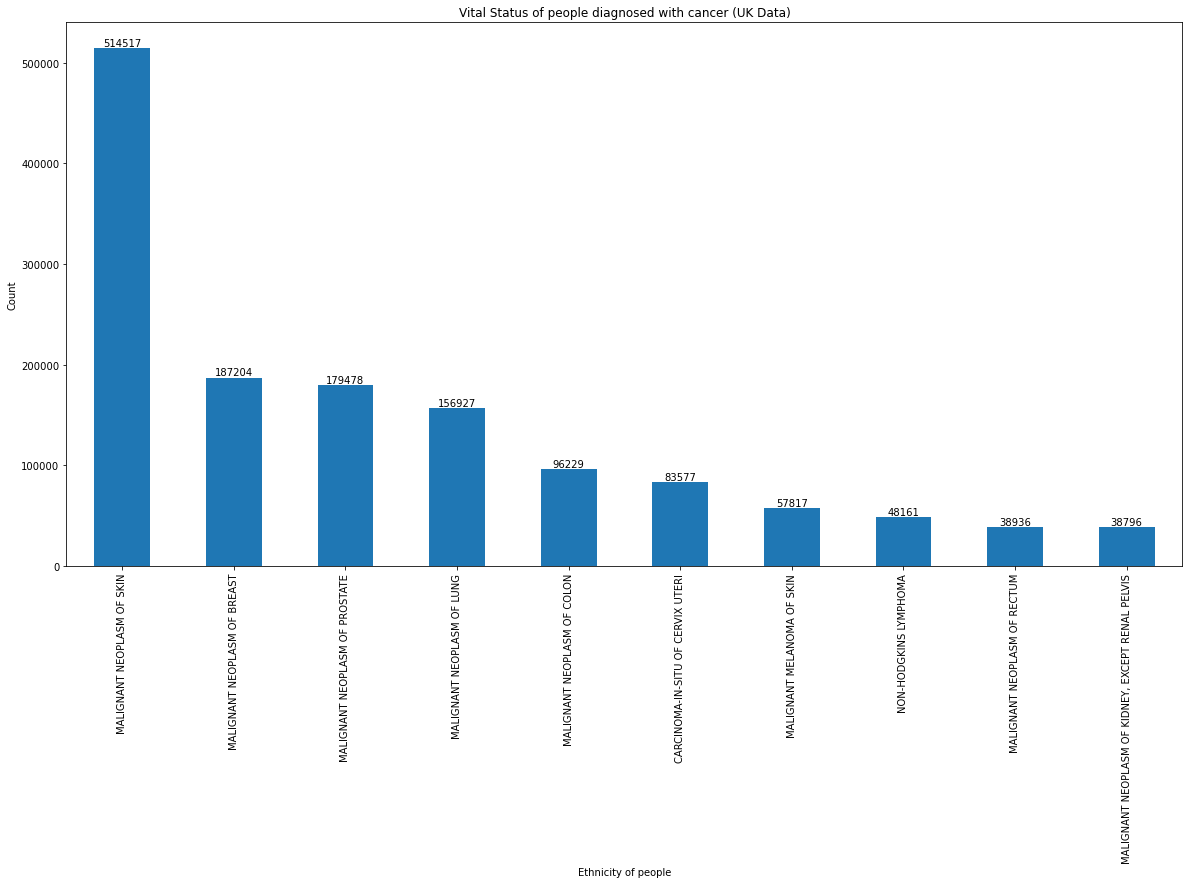

In [65]:
#Plotting the graph
# Create the chart
ax=req_2.plot(kind='bar')
# Set the labels and title
for i, value in enumerate(ax.patches):
    height = value.get_height()
    plt.text(value.get_x() + value.get_width() / 2, height + 1, int(height), ha='center', va='bottom')
plt.xlabel("Ethnicity of people")
plt.ylabel("Count")
plt.title("Vital Status of people diagnosed with cancer (UK Data)")
#Displaying the chart
plt.show()

## Requirement 3

In [66]:
req_3=tumour.groupby(['Age group (years)','CANCERCAREPLANINTENT'])['TUMOURID'].count()
req_3 = req_3.reset_index()
pivot_data = req_3.pivot(index="Age group (years)", columns="CANCERCAREPLANINTENT")
pivot_data

TUMOURID                                           
CANCERCAREPLANINTENT Curative No active treatment Non Curative Not known
Age group (years)                                                       
00–04                     509                  50          115       127
05–09                     381                  35           96       135
10–14                     407                  33           89        94
15–19                     704                  46          112       175
20–24                    1419                  75          224       272
25–29                    4816                 167          415       594
30–34                    6685                 258          635       947
35–39                    9354                 348         1043      1302
40–44                   12102                 446         1481      1673
45–49                   21314                 808         2912      3064
50–54                   33709                1436         5468      5179
55–59                   42137                2290         8997      7680
60–64                   50220                3260        12698     10038
65–69                   62981                4602        17954     13649
70–74                   75113                6194        24163     16795
75–79                   63179                5975        22390     14380
80–84                   52261                5531        19781     11499
85–89                   35367                4066        13646      7708
90+                     21562                2500         7806      4397

In [67]:
plt.rcParams["figure.figsize"] = [20,10]

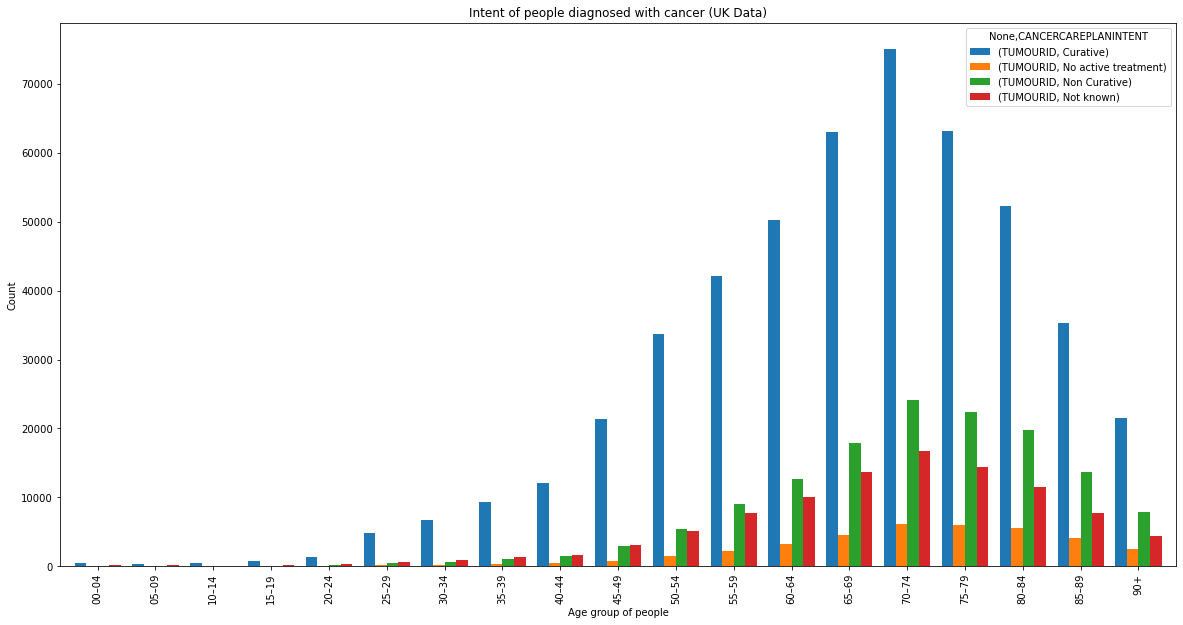

In [68]:
#Plotting the graph
# Create the chart
ax=pivot_data.plot(width=0.8,kind='bar')
# Set the labels and title
plt.xlabel("Age group of people")
plt.ylabel("Count")
plt.title("Intent of people diagnosed with cancer (UK Data)")
#Displaying the chart
plt.show()

## Requirement 4

In [69]:
req_4=patient.groupby(['ETHNICITY','VITALSTATUS'])['PATIENTID'].count()
req_4 = req_4.reset_index()
pivot_data = req_4.pivot(index="ETHNICITY", columns="VITALSTATUS")
total_counts = req_4.groupby('VITALSTATUS')['PATIENTID'].sum()
pivot_data

PATIENTID            \
VITALSTATUS                       Alive      Dead   
ETHNICITY                                           
8 OTHER                             3.0       NaN   
ASIAN BANGLADESHI                1616.0    1227.0   
ASIAN INDIAN                     9406.0    5789.0   
ASIAN PAKISTANI                  5682.0    3649.0   
BLACK AFRICAN                    6217.0    3439.0   
BLACK CARIBBEAN                  7592.0    4450.0   
C ANY OTHER WHITE BACKGROUND    40722.0   20800.0   
CHINESE                          2332.0    1445.0   
English                             1.0       NaN   
G ANY OTHER MIXED BACKGROUND     2184.0    1145.0   
L ANY OTHER ASIAN BACKGROUND     5567.0    3399.0   
MIXED WHITE AND ASIAN             903.0     502.0   
MIXED WHITE AND BLACK AFRICAN     633.0     316.0   
NOT STATED                      45437.0   21491.0   
P ANY OTHER BLACK BACKGROUND     3351.0    1828.0   
Polish                              1.0       NaN   
S ANY OTHER ETHNIC GROUP        13213.0    7465.0   
Turkish                             1.0       NaN   
WHITE                             111.0      61.0   
WHITE AND BLACK CARIBBEAN        1285.0     620.0   
WHITE BRITISH                  992390.0  529938.0   
WHITE IRISH                     10227.0    5770.0   
X NOT KNOWN                     10565.0    4222.0   

                                                                           \
VITALSTATUS                   Dies before a date of trace returning alive   
ETHNICITY                                                                   
8 OTHER                                                               NaN   
ASIAN BANGLADESHI                                                     NaN   
ASIAN INDIAN                                                          4.0   
ASIAN PAKISTANI                                                       3.0   
BLACK AFRICAN                                                         3.0   
BLACK CARIBBEAN                                                       6.0   
C ANY OTHER WHITE BACKGROUND                                         27.0   
CHINESE                                                               2.0   
English                                                               NaN   
G ANY OTHER MIXED BACKGROUND                                          3.0   
L ANY OTHER ASIAN BACKGROUND                                          5.0   
MIXED WHITE AND ASIAN                                                 1.0   
MIXED WHITE AND BLACK AFRICAN                                         NaN   
NOT STATED                                                           27.0   
P ANY OTHER BLACK BACKGROUND                                          3.0   
Polish                                                                NaN   
S ANY OTHER ETHNIC GROUP                                              5.0   
Turkish                                                               NaN   
WHITE                                                                 NaN   
WHITE AND BLACK CARIBBEAN                                             NaN   
WHITE BRITISH                                                       804.0   
WHITE IRISH                                                          10.0   
X NOT KNOWN                                                           3.0   

                                                      \
VITALSTATUS                   Dies before diagnosis    
ETHNICITY                                              
8 OTHER                                          NaN   
ASIAN BANGLADESHI                                NaN   
ASIAN INDIAN                                     1.0   
ASIAN PAKISTANI                                  NaN   
BLACK AFRICAN                                    NaN   
BLACK CARIBBEAN                                  NaN   
C ANY OTHER WHITE BACKGROUND                     NaN   
CHINESE                                          NaN   
English                         

In [70]:
plt.rcParams["figure.figsize"] = [20,10]

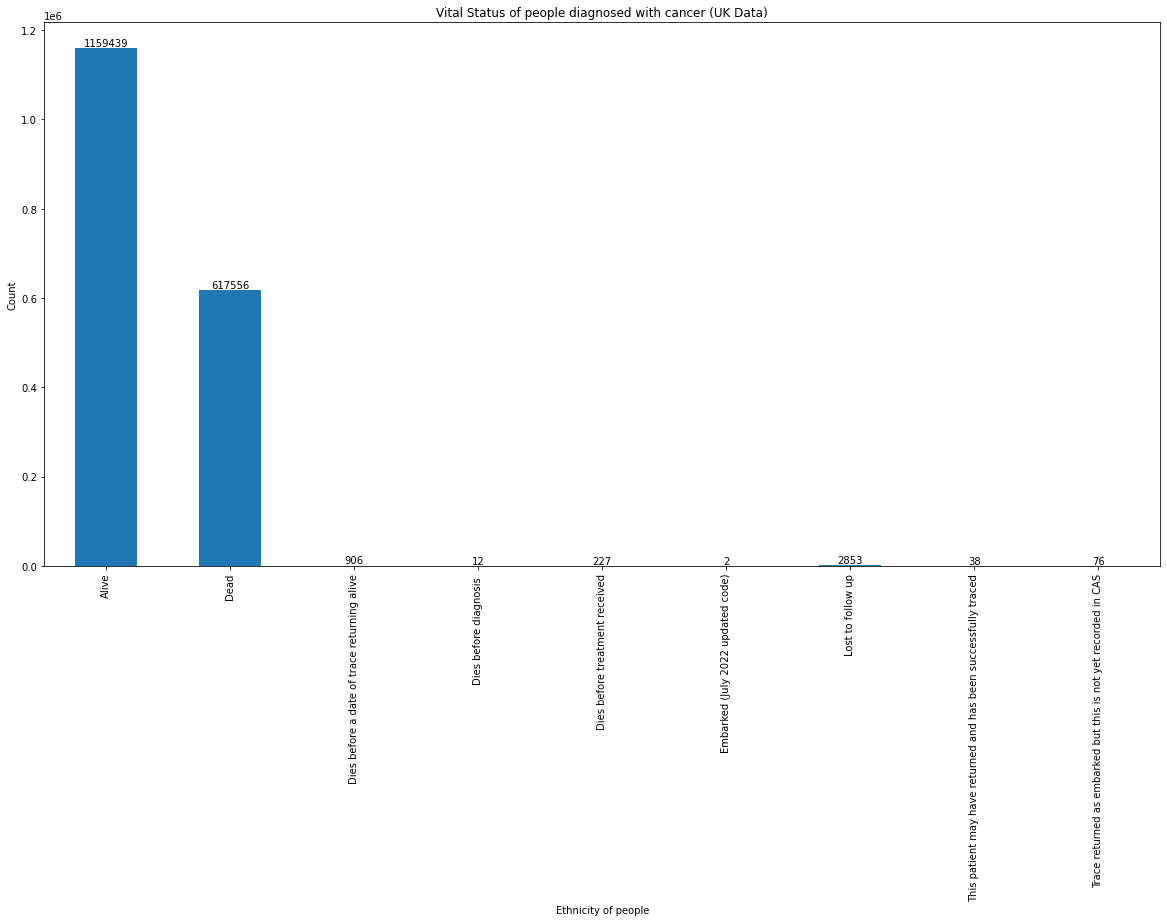

In [71]:
#Plotting the graph
# Create the chart
ax=total_counts.plot(kind='bar')
# Set the labels and title
for i, value in enumerate(ax.patches):
    height = value.get_height()
    plt.text(value.get_x() + value.get_width() / 2, height + 1, int(height), ha='center', va='bottom')
plt.xlabel("Ethnicity of people")
plt.ylabel("Count")
plt.title("Vital Status of people diagnosed with cancer (UK Data)")
#Displaying the chart
plt.show()

## Requirement 5

In [72]:
tumour['DIAGNOSISDATEBEST'] = pd.to_datetime(tumour['DIAGNOSISDATEBEST'])
tumour['DIAGNOSISDATEBEST'] = tumour['DIAGNOSISDATEBEST'].dt.strftime('%Y')

In [73]:
category_counts = tumour.groupby(['DIAGNOSISDATEBEST','GRADE']).size().unstack(fill_value=0)
category_counts

GRADE,1 / I / WELL DIFFERENTIATED,2 / II / MODERATELY DIFFERENTIATED,3 / III / POORLY DIFFERENTIATED,4 / IV / UNDIFFERENTIATED / ANAPLASTIC,HIGH,INTERMEDIATE,LOW,X
DIAGNOSISDATEBEST,,,,,,,,
2016,25547,76732,53870,3667,11657,1999,2934,309207
2017,26259,76661,53288,3723,11602,2008,3059,305997
2018,26677,79076,53580,3666,11503,2062,3168,308271
2019,26836,78929,52682,3719,11701,2198,3074,264959


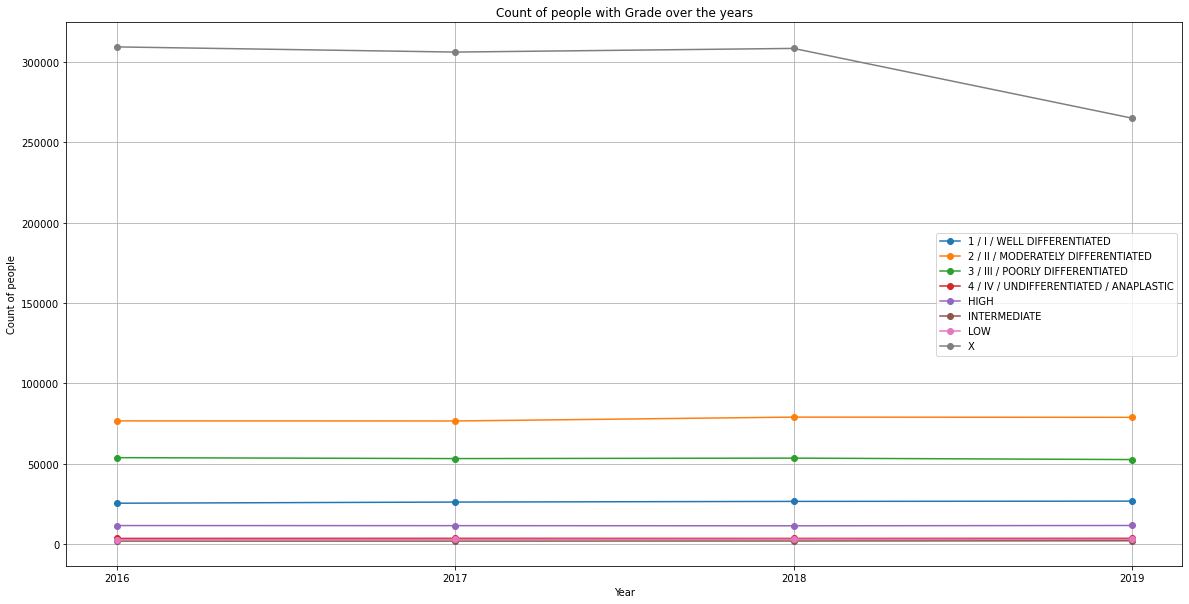

In [74]:
# Extract x (Category2) and y (value counts) data
x = category_counts.index
y = category_counts.values.T

# Create the line plot
for i, category1 in enumerate(category_counts.columns):
    plt.plot(x, y[i], marker='o', label=f'{category1}')


# Set labels and title
plt.xlabel('Year')
plt.ylabel('Count of people')
plt.title('Count of people with Grade over the years')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


## Requirement 6

In [75]:
count_hist = tumour['MORPH_ICD10_O2'].value_counts().head(10).index
filtered_df = tumour[tumour['MORPH_ICD10_O2'].isin(count_hist)]
req_6=filtered_df.pivot_table(index='Age group (years)',columns="MORPH_ICD10_O2", aggfunc='size', fill_value=0)
req_6  

MORPH_ICD10_O2,ADENOCARCINOMA NOS,BASAL CELL CARCINOMA NOS,CA LOBULAR NOS,CARCINOMA NOS,DUCT INFILTRATING CARCINOMA,INTRADUCTAL CA NON INFILTRATING,"INTRAEPITHELIAL NEOPLASIA GRADE III OF CERVIX , VULVA AND VAGINA",NEOPLASM MALIGNANT,SQUAMOUS CARCINOMA NOS,SUPERFICIAL SPREADING MELANOMA
Age group (years),,,,,,,,,,
00–04,23,26,1,18,5,0,0,182,46,2
05–09,11,29,0,10,1,0,0,101,31,1
10–14,40,43,0,6,2,0,1,48,30,11
15–19,89,74,3,8,8,0,12,66,74,36
20–24,208,238,8,21,81,34,286,114,176,225
25–29,556,781,89,57,546,1047,29310,259,910,568
30–34,1133,1986,292,109,1657,888,21635,414,1704,967
35–39,2065,3889,567,206,3459,684,11815,602,2575,1207
40–44,2903,5979,974,292,5975,855,6739,867,3638,1458


In [76]:
plt.rcParams["figure.figsize"] = [20,10]

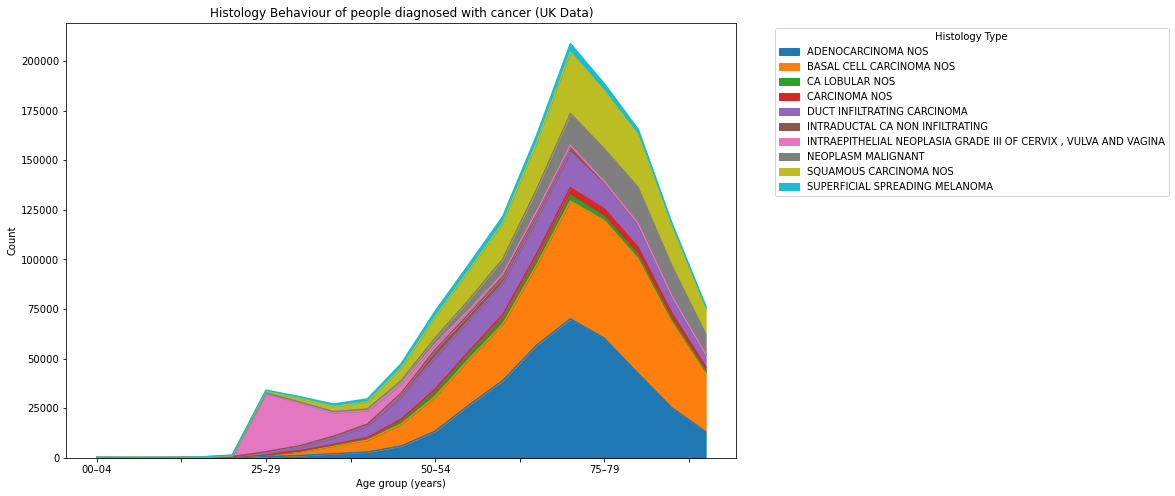

In [77]:
# Plot a stacked area chart
req_6.plot(kind='area', stacked=True, figsize=(12, 8))
plt.xlabel("Age group (years)")
plt.ylabel("Count")
plt.title("Histology Behaviour of people diagnosed with cancer (UK Data)")
plt.legend(title='Histology Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the chart
plt.show()

## Requirement 7

In [78]:
category_value = 'Dead'
mask = patient['VITALSTATUS'] == category_value
filtered_df = patient[mask]
filtered_df

,PATIENTID,GENDER,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
6,10000007,Male,WHITE BRITISH,F03,NaN,NaN,"G309,J459",F03,X,Dead,2020-06-05,101226750
27,10000028,Male,WHITE BRITISH,C798,NaN,NaN,"C61,U071",C679,4,Dead,2021-04-08,100463390
48,10000049,Male,WHITE BRITISH,"G20,F03",NaN,NaN,NaN,G318,X,Dead,2020-10-04,100545450
57,10000058,Female,WHITE BRITISH,"R688,R54,R418",NaN,NaN,"J449,I64,I714",N390,1,Dead,2018-03-20,100625629
77,10000078,Female,WHITE BRITISH,I259,I251,NaN,"I489,I500",I251,1,Dead,2019-04-02,101767306
...,...,...,...,...,...,...,...,...,...,...,...,...
1871599,250002538,Male,WHITE BRITISH,"C809,C786",NaN,NaN,NaN,C060,2,Dead,2016-05-28,100840938
1871601,250002540,Female,L ANY OTHER ASIAN BACKGROUND,NaN,NaN,NaN,NaN,NaN,NaN,Dead,2021-06-10,101223249
1871602,250002541,Female,WHITE BRITISH,C439,NaN,NaN,NaN,I259,4,Dead,2022-06-10,100870402
1871603,250002542,Male,WHITE BRITISH,C66,NaN,NaN,"I259,J449,I10",C66,2,Dead,2019-09-25,100803641


In [79]:
req_7=filtered_df.groupby(['ETHNICITY','VITALSTATUS'])['PATIENTID'].count()
req_7 = req_7.reset_index()
pivot_data = req_7.pivot(index="ETHNICITY", columns="VITALSTATUS")
pivot_data

,PATIENTID
VITALSTATUS,Dead
ETHNICITY,
ASIAN BANGLADESHI,1227
ASIAN INDIAN,5789
ASIAN PAKISTANI,3649
BLACK AFRICAN,3439
BLACK CARIBBEAN,4450
C ANY OTHER WHITE BACKGROUND,20800
CHINESE,1445
G ANY OTHER MIXED BACKGROUND,1145


In [80]:
plt.rcParams["figure.figsize"] = [20,10]

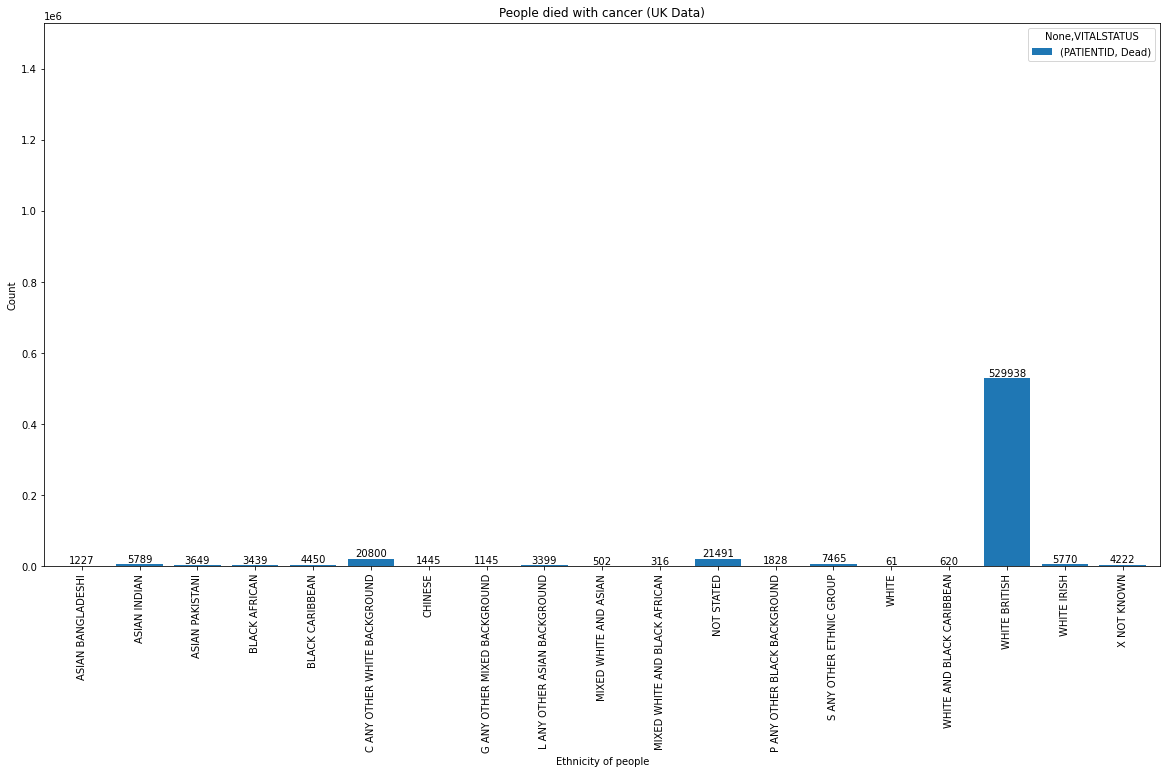

In [81]:
#Plotting the graph
# Create the chart
ax=pivot_data.plot(width=0.8,kind='bar')
# Set the labels and title
for i, value in enumerate(ax.patches):
    height = value.get_height()
    plt.text(value.get_x() + value.get_width() / 2, height + 1, int(height), ha='center', va='bottom')
plt.ylim(0, max(pivot_data.max()) + 1000000)
plt.xlabel("Ethnicity of people")
plt.ylabel("Count")
plt.title("People died with cancer (UK Data)")
#Displaying the chart
plt.show()

In [82]:
patient_columns = ['PATIENTID', 'ETHNICITY', 'VITALSTATUS']

patient_df = patient[patient_columns]


In [83]:
tumour_columns = ['GENDER', 'PATIENTID','SITE_ICD10_O2_3CHAR', 'AGE',]

tumour_df = tumour[tumour_columns]

In [84]:
cycle_columns = ['MERGED_REGIMEN_ID', 'MERGED_CYCLE_ID', 'CYCLE_NUMBER']

cycle_df = cycle[cycle_columns]


In [85]:
regimen_columns = ['ENCORE_PATIENT_ID','MAPPED_REGIMEN','MERGED_REGIMEN_ID']

regimen_df = regimen[regimen_columns]

In [86]:
drug_detail_columns = ['MERGED_CYCLE_ID', 'ACTUAL_DOSE_PER_ADMINISTRATION']

drug_detail_df = drug_detail[drug_detail_columns]

In [87]:
patient_df

,PATIENTID,ETHNICITY,VITALSTATUS
0,10000001,WHITE BRITISH,Alive
1,10000002,NaN,Alive
2,10000003,WHITE BRITISH,Alive
3,10000004,WHITE BRITISH,Alive
4,10000005,WHITE BRITISH,Alive
...,...,...,...
1871600,250002539,WHITE BRITISH,Alive
1871601,250002540,L ANY OTHER ASIAN BACKGROUND,Dead
1871602,250002541,WHITE BRITISH,Dead
1871603,250002542,WHITE BRITISH,Dead


In [88]:
tumour_df

,GENDER,PATIENTID,SITE_ICD10_O2_3CHAR,AGE
0,Male,10000001,MALIGNANT NEOPLASM OF SKIN,84
1,Male,10000002,MALIGNANT NEOPLASM OF SKIN,67
2,Female,10000003,MALIGNANT NEOPLASM OF SKIN,79
3,Male,10000004,MALIGNANT NEOPLASM OF SKIN,76
4,Male,10000005,MALIGNANT NEOPLASM OF SKIN,49
...,...,...,...,...
1995565,Male,250002429,"MALIGNANT NEOPLASM OF KIDNEY, EXCEPT RENAL PELVIS",70
1995566,Male,250002512,MALIGNANT NEOPLASM OF PROSTATE,59
1995567,Male,250000217,MALIGNANT NEOPLASM OF THYROID GLAND,59
1995568,Male,250001761,MALIGNANT NEOPLASM OF URETER,75


In [89]:
cycle_df

,MERGED_REGIMEN_ID,MERGED_CYCLE_ID,CYCLE_NUMBER
0,10030621,10000001,1
1,10030622,10000002,1
2,10030627,10000003,2
3,10030628,10000004,1
4,10030632,10000005,1
...,...,...,...
2741669,250000328,250007457,19
2741670,250000649,250007458,3
2741671,250001730,250007459,13
2741672,250006666,250007460,6


In [90]:
regimen_df

,ENCORE_PATIENT_ID,MAPPED_REGIMEN,MERGED_REGIMEN_ID
0,10403208,Hydroxycarbamide,10030621
1,10403217,Enzalutamide,10030622
2,10403309,Enzalutamide,10030627
3,10403312,NaN,10030628
4,10403374,Enzalutamide,10030632
...,...,...,...
781384,250001331,PACLITAXEL,250009402
781385,250002014,Atezolizumab,250009404
781386,250001131,Cisplatin + Pemetrexed,250009409
781387,250002541,NaN,250009411


In [91]:
drug_detail_df

,MERGED_CYCLE_ID,ACTUAL_DOSE_PER_ADMINISTRATION
0,10000001,420.0
1,10000002,420.0
2,10000003,420.0
3,10000004,NaN
4,10000005,420.0
...,...,...
7662025,250000920,100.0
7662026,250006467,0.0
7662027,250000920,2.0
7662028,250000920,0.0


In [92]:
#merging dataframes.


patient_tumour = (
    pd.merge(patient_df, tumour_df, how ='left', on='PATIENTID')
)

In [93]:
patinet_tumour_regimen = pd.merge(patient_tumour, regimen_df, how ='left', 
                                  left_on='PATIENTID', right_on='ENCORE_PATIENT_ID')

In [94]:
patient_tumour_regimen_cycle = pd.merge(patinet_tumour_regimen, cycle_df, how ='left', on='MERGED_REGIMEN_ID')

In [95]:
patient_tumour_regimen_cycle_drug = pd.merge(patient_tumour_regimen_cycle, drug_detail_df, how='left',
                                             on='MERGED_CYCLE_ID')

In [96]:
patient_tumour_regimen_cycle_drug

,PATIENTID,ETHNICITY,VITALSTATUS,GENDER,SITE_ICD10_O2_3CHAR,AGE,ENCORE_PATIENT_ID,MAPPED_REGIMEN,MERGED_REGIMEN_ID,MERGED_CYCLE_ID,CYCLE_NUMBER,ACTUAL_DOSE_PER_ADMINISTRATION
0,10000001,WHITE BRITISH,Alive,Male,MALIGNANT NEOPLASM OF SKIN,84,NaN,NaN,NaN,NaN,NaN,NaN
1,10000002,NaN,Alive,Male,MALIGNANT NEOPLASM OF SKIN,67,NaN,NaN,NaN,NaN,NaN,NaN
2,10000003,WHITE BRITISH,Alive,Female,MALIGNANT NEOPLASM OF SKIN,79,NaN,NaN,NaN,NaN,NaN,NaN
3,10000004,WHITE BRITISH,Alive,Male,MALIGNANT NEOPLASM OF SKIN,76,NaN,NaN,NaN,NaN,NaN,NaN
4,10000005,WHITE BRITISH,Alive,Male,MALIGNANT NEOPLASM OF SKIN,49,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10318006,250002543,WHITE BRITISH,Dead,Female,MALIGNANT NEOPLASM OF SMALL INTESTINE,68,250002543.0,Paclitaxel Priming,250008366.0,250001534.0,1.0,0.0
10318007,250002543,WHITE BRITISH,Dead,Female,MALIGNANT NEOPLASM OF SMALL INTESTINE,68,250002543.0,Paclitaxel Priming,250008366.0,250001534.0,1.0,2200.0
10318008,250002543,WHITE BRITISH,Dead,Female,MALIGNANT NEOPLASM OF SMALL INTESTINE,68,250002543.0,Paclitaxel Priming,250008366.0,250001534.0,1.0,1368.0
10318009,250002543,WHITE BRITISH,Dead,Female,MALIGNANT NEOPLASM OF SMALL INTESTINE,68,250002543.0,Paclitaxel Priming,250008366.0,250001534.0,1.0,0.0


In [97]:
merged_df = patient_tumour_regimen_cycle_drug.drop('ENCORE_PATIENT_ID', axis=1)

In [98]:
merged_df

,PATIENTID,ETHNICITY,VITALSTATUS,GENDER,SITE_ICD10_O2_3CHAR,AGE,MAPPED_REGIMEN,MERGED_REGIMEN_ID,MERGED_CYCLE_ID,CYCLE_NUMBER,ACTUAL_DOSE_PER_ADMINISTRATION
0,10000001,WHITE BRITISH,Alive,Male,MALIGNANT NEOPLASM OF SKIN,84,NaN,NaN,NaN,NaN,NaN
1,10000002,NaN,Alive,Male,MALIGNANT NEOPLASM OF SKIN,67,NaN,NaN,NaN,NaN,NaN
2,10000003,WHITE BRITISH,Alive,Female,MALIGNANT NEOPLASM OF SKIN,79,NaN,NaN,NaN,NaN,NaN
3,10000004,WHITE BRITISH,Alive,Male,MALIGNANT NEOPLASM OF SKIN,76,NaN,NaN,NaN,NaN,NaN
4,10000005,WHITE BRITISH,Alive,Male,MALIGNANT NEOPLASM OF SKIN,49,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10318006,250002543,WHITE BRITISH,Dead,Female,MALIGNANT NEOPLASM OF SMALL INTESTINE,68,Paclitaxel Priming,250008366.0,250001534.0,1.0,0.0
10318007,250002543,WHITE BRITISH,Dead,Female,MALIGNANT NEOPLASM OF SMALL INTESTINE,68,Paclitaxel Priming,250008366.0,250001534.0,1.0,2200.0
10318008,250002543,WHITE BRITISH,Dead,Female,MALIGNANT NEOPLASM OF SMALL INTESTINE,68,Paclitaxel Priming,250008366.0,250001534.0,1.0,1368.0
10318009,250002543,WHITE BRITISH,Dead,Female,MALIGNANT NEOPLASM OF SMALL INTESTINE,68,Paclitaxel Priming,250008366.0,250001534.0,1.0,0.0


In [99]:
drug_detail_df['MERGED_CYCLE_ID'].value_counts()

150002508    187
150007424    152
150002779    145
150003568    138
150000444    134
            ... 
70057198       1
70057196       1
70057195       1
70057192       1
70056878       1
Name: MERGED_CYCLE_ID, Length: 2729567, dtype: int64

In [100]:
a_req_ICD10_1=aus_data.groupby('ICD10 codes')['Count'].sum()

In [101]:
a_req_ICD10_1.head(10)

ICD10 codes
C00                  2351
C00–C14, C30–C32    14020
C01–C02              3042
C01–C14, C30–C32    11669
C03–C06              1902
C07                   709
C07–C08               910
C08.0                 139
C08.1                   8
C08.8–C08.9            54
Name: Count, dtype: int64

In [102]:
merged_df['SITE_ICD10_O2_3CHAR'].value_counts()

MALIGNANT NEOPLASM OF BREAST                              1530348
MALIGNANT NEOPLASM OF LUNG                                 806478
MALIGNANT NEOPLASM OF SKIN                                 767461
NON-HODGKINS LYMPHOMA                                      692442
LEUKAEMIA                                                  595255
                                                           ...   
MALIGNANT NEOPLASM OF MENINGES                               1476
MALIGNANT NEOPLASM OF MALE GENITAL ORGANS                    1401
MALIGNANT NEOPLASM OF TRACHEA                                1054
MALIGNANT NEOPLASM OF PHARYNX                                 852
MALIGNANT NEOPLASM OF INTRATHORACIC/RESPIRATORY SYSTEM        243
Name: SITE_ICD10_O2_3CHAR, Length: 91, dtype: int64

In [103]:

# Select the two columns cancer types and medication types for the new DataFrame

df1 = merged_df[['SITE_ICD10_O2_3CHAR', 'MAPPED_REGIMEN']].copy()

# Add a new column 'Count' with the counts of unique values from 'MAPPED_REGIMEN'
df1['Count'] = df1['MAPPED_REGIMEN'].map(df1['MAPPED_REGIMEN'].value_counts())

# Drop duplicates to keep only unique rows
df1 = df1.drop_duplicates()

# Reset the index
df1 = df1.reset_index(drop=True)

In [104]:
df1

,SITE_ICD10_O2_3CHAR,MAPPED_REGIMEN,Count
0,MALIGNANT NEOPLASM OF SKIN,NaN,NaN
1,MALIGNANT NEOPLASM OF SKIN,CARBOPLATIN,45689.0
2,MALIGNANT NEOPLASM OF SKIN,Bortezomib + Panobinostat + unknown see comment,81.0
3,MALIGNANT NEOPLASM OF SKIN,CYCLOPHOSPHAMIDE + POMALIDOMIDE,425.0
4,MALIGNANT NEOPLASM OF SKIN,CARFILZOMIB,1037.0
...,...,...,...
35491,MALIGNANT NEOPLASM OF PYRIFORM SINUS,TEMOZOLOMIDE,18393.0
35492,MALIGNANT NEOPLASM OF PERITONEUM,REGORAFENIB,2224.0
35493,MESOTHELIOMA,Cisplatin + Radiotherapy + CISPLATIN,1759.0
35494,MALIGNANT NEOPLASM OF SOFT TISSUE,Paclitaxel Priming,123.0


In [105]:

# Choose a unique value from SITE_ICD10_O2_3CHAR to select
unique_value = 'MALIGNANT NEOPLASM OF BREAST'

# Filter the DataFrame to select rows with the chosen unique value in SITE_ICD10_O2_3CHAR
selected_rows = df1[df1['SITE_ICD10_O2_3CHAR'] == unique_value]

# Use drop_duplicates() to remove repeated values in MAPPED_REGIMEN
selected_rows = selected_rows.drop_duplicates(subset='MAPPED_REGIMEN')

# Initialize an empty list to store selected rows as dictionaries
selected_rows_list = []

# Iterate through selected rows and store them as dictionaries in the list
for index, row in selected_rows.iterrows():
    selected_row_dict = {'SITE_ICD10_O2_3CHAR': row['SITE_ICD10_O2_3CHAR'], 
                         'MAPPED_REGIMEN': row['MAPPED_REGIMEN'], 'Count': row['Count']}
    selected_rows_list.append(selected_row_dict)

# Create a new DataFrame from the list of selected rows
breast_regimen = pd.DataFrame(selected_rows_list)

In [106]:
breast_regimen

,SITE_ICD10_O2_3CHAR,MAPPED_REGIMEN,Count
0,MALIGNANT NEOPLASM OF BREAST,NaN,NaN
1,MALIGNANT NEOPLASM OF BREAST,NAB PACLITAXEL,3251.0
2,MALIGNANT NEOPLASM OF BREAST,CYTARABINE + DAUNORUBICIN,3067.0
3,MALIGNANT NEOPLASM OF BREAST,CHOP R,86939.0
4,MALIGNANT NEOPLASM OF BREAST,Cisplatin + Radiotherapy,52396.0
...,...,...,...
977,MALIGNANT NEOPLASM OF BREAST,BEVACIZUMAB + CARBO,311.0
978,MALIGNANT NEOPLASM OF BREAST,CYTARABINE + DAUNORUBICIN + Gemtuzumab Ozogamicin,483.0
979,MALIGNANT NEOPLASM OF BREAST,Alemtuz+Fludara+Melphalan RIC MUD,1787.0
980,MALIGNANT NEOPLASM OF BREAST,"WT SIOP 2002 01 post op Carbo, Etop",211.0


In [107]:
top_10_breast_regimen = breast_regimen['MAPPED_REGIMEN'].value_counts().index[:10]

# Create a new DataFrame to store the selected top 10 mapped regimens
top_10_breast_regimen = breast_regimen[breast_regimen['MAPPED_REGIMEN'].isin(top_10_breast_regimen)]

counts = top_10_breast_regimen['MAPPED_REGIMEN'].value_counts()

# Merge the counts information into the original DataFrame
top_10_breast_regimen = top_10_breast_regimen.merge(counts.rename('Count'), left_on='MAPPED_REGIMEN', right_index=True)


In [108]:
top_10_breast_regimen

,SITE_ICD10_O2_3CHAR,MAPPED_REGIMEN,Count_x,Count_y
1,MALIGNANT NEOPLASM OF BREAST,NAB PACLITAXEL,3251.0,1
646,MALIGNANT NEOPLASM OF BREAST,Paclitaxel+Trastuzumab 21day Load,63.0,1
648,MALIGNANT NEOPLASM OF BREAST,BOSUTINIB,3872.0,1
649,MALIGNANT NEOPLASM OF BREAST,CYCLOPHOSPHAMIDE + VINORELBINE,540.0,1
650,MALIGNANT NEOPLASM OF BREAST,REMODL-A,116.0,1
651,MALIGNANT NEOPLASM OF BREAST,DA,2612.0,1
652,MALIGNANT NEOPLASM OF BREAST,AML17 TRIAL,14243.0,1
653,MALIGNANT NEOPLASM OF BREAST,GEM-P,1176.0,1
654,MALIGNANT NEOPLASM OF BREAST,CAPECITABINE + PACLITAXEL,155.0,1
655,MALIGNANT NEOPLASM OF BREAST,CYCLOPHOSPHAMIDE + PACLITAXEL ALBUMIN (ABRAXAN...,18.0,1


In [109]:
top_10_breast_regimen = top_10_breast_regimen.drop('Count_y', axis=1)


In [110]:
top_10_breast_regimen

,SITE_ICD10_O2_3CHAR,MAPPED_REGIMEN,Count_x
1,MALIGNANT NEOPLASM OF BREAST,NAB PACLITAXEL,3251.0
646,MALIGNANT NEOPLASM OF BREAST,Paclitaxel+Trastuzumab 21day Load,63.0
648,MALIGNANT NEOPLASM OF BREAST,BOSUTINIB,3872.0
649,MALIGNANT NEOPLASM OF BREAST,CYCLOPHOSPHAMIDE + VINORELBINE,540.0
650,MALIGNANT NEOPLASM OF BREAST,REMODL-A,116.0
651,MALIGNANT NEOPLASM OF BREAST,DA,2612.0
652,MALIGNANT NEOPLASM OF BREAST,AML17 TRIAL,14243.0
653,MALIGNANT NEOPLASM OF BREAST,GEM-P,1176.0
654,MALIGNANT NEOPLASM OF BREAST,CAPECITABINE + PACLITAXEL,155.0
655,MALIGNANT NEOPLASM OF BREAST,CYCLOPHOSPHAMIDE + PACLITAXEL ALBUMIN (ABRAXAN...,18.0


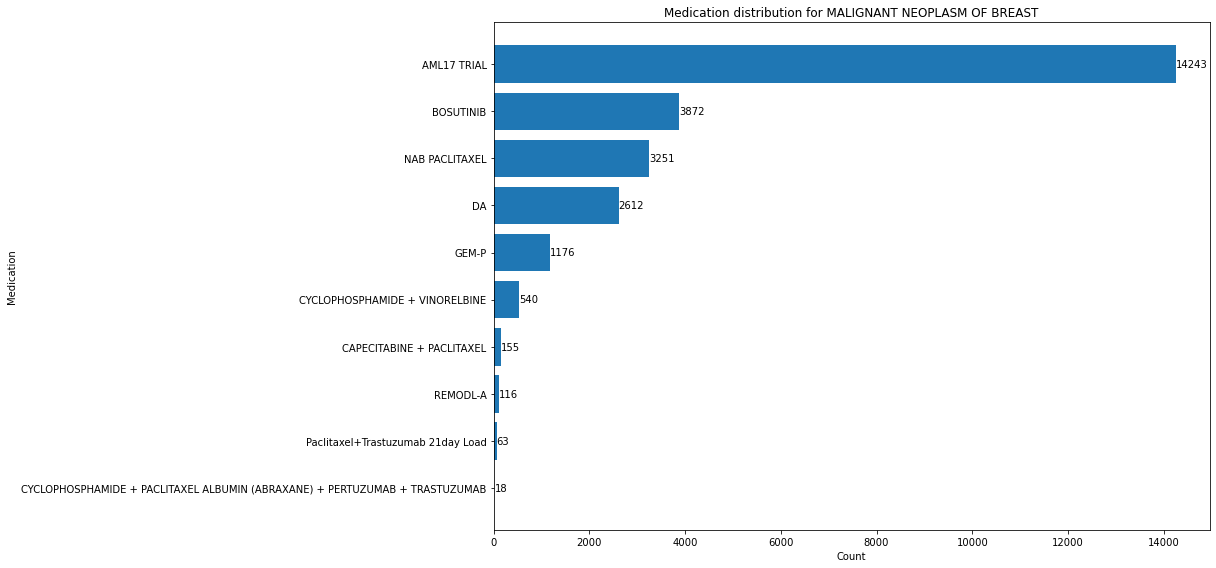

In [111]:
# Filter the DataFrame for 'MALIGNANT NEOPLASM OF BREAST'
breast_cancer_data = top_10_breast_regimen[top_10_breast_regimen['SITE_ICD10_O2_3CHAR'] == 'MALIGNANT NEOPLASM OF BREAST']
# Sort the DataFrame by 'Count_x' in descending order
breast_cancer_data = breast_cancer_data.sort_values(by='Count_x', ascending=True)

# Create a bar chart for 'MAPPED_REGIMEN' vs 'Count_x' with annotations
plt.figure(figsize=(17, 8))
bars = plt.barh(breast_cancer_data['MAPPED_REGIMEN'], breast_cancer_data['Count_x'])
plt.xlabel('Count')
plt.ylabel('Medication')
plt.title('Medication distribution for MALIGNANT NEOPLASM OF BREAST')

# Add annotations for the counts above the bars
for bar in bars:
    width = bar.get_width()
    count = int(width)  # Convert width to integer for annotation
    plt.text(width, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [112]:
# FOR LUNG CANCET PATIENTS

# Choose a unique value from SITE_ICD10_O2_3CHAR to select
unique_value = 'MALIGNANT NEOPLASM OF LUNG'

# Filter the DataFrame to select rows with the chosen unique value in SITE_ICD10_O2_3CHAR
selected_rows = df1[df1['SITE_ICD10_O2_3CHAR'] == unique_value]

# Use drop_duplicates() to remove repeated values in MAPPED_REGIMEN
selected_rows = selected_rows.drop_duplicates(subset='MAPPED_REGIMEN')

# Initialize an empty list to store selected rows as dictionaries
selected_rows_list = []

# Iterate through selected rows and store them as dictionaries in the list
for index, row in selected_rows.iterrows():
    selected_row_dict = {'SITE_ICD10_O2_3CHAR': row['SITE_ICD10_O2_3CHAR'], 
                         'MAPPED_REGIMEN': row['MAPPED_REGIMEN'], 'Count': row['Count']}
    selected_rows_list.append(selected_row_dict)

# Create a new DataFrame from the list of selected rows
lungs_regimen = pd.DataFrame(selected_rows_list)

In [113]:
lungs_regimen

,SITE_ICD10_O2_3CHAR,MAPPED_REGIMEN,Count
0,MALIGNANT NEOPLASM OF LUNG,Ofatumumab Weekly,46.0
1,MALIGNANT NEOPLASM OF LUNG,LORLATINIB,1172.0
2,MALIGNANT NEOPLASM OF LUNG,Eribulin,11857.0
3,MALIGNANT NEOPLASM OF LUNG,Durvalumab,5700.0
4,MALIGNANT NEOPLASM OF LUNG,NaN,NaN
...,...,...,...
1234,MALIGNANT NEOPLASM OF LUNG,DA,2612.0
1235,MALIGNANT NEOPLASM OF LUNG,R CODOX M,1196.0
1236,MALIGNANT NEOPLASM OF LUNG,CYTARABINE + FLUDARABINE,54.0
1237,MALIGNANT NEOPLASM OF LUNG,GEMTUZUMAB OZOGAMICIN,568.0


In [114]:
top_10_lungs_regimen = lungs_regimen['MAPPED_REGIMEN'].value_counts().index[:10]

# Create a new DataFrame to store the selected top 10 mapped regimens
top_10_lungs_regimen = lungs_regimen[lungs_regimen['MAPPED_REGIMEN'].isin(top_10_lungs_regimen)]

counts = top_10_lungs_regimen['MAPPED_REGIMEN'].value_counts()

# Merge the counts information into the original DataFrame
top_10_lungs_regimen = top_10_lungs_regimen.merge(counts.rename('Count'), left_on='MAPPED_REGIMEN', right_index=True)


In [115]:
top_10_lungs_regimen

,SITE_ICD10_O2_3CHAR,MAPPED_REGIMEN,Count_x,Count_y
0,MALIGNANT NEOPLASM OF LUNG,Ofatumumab Weekly,46.0,1
823,MALIGNANT NEOPLASM OF LUNG,ALL ALLR3: Maint Wk 1-12 wth IT Mtx,40.0,1
824,MALIGNANT NEOPLASM OF LUNG,CHOP R + METHOTREXATE,569.0,1
825,MALIGNANT NEOPLASM OF LUNG,FLUDARABINE + MELPHALAN,347.0,1
826,MALIGNANT NEOPLASM OF LUNG,Fludarabine + Melphalan RIC Allo,522.0,1
827,MALIGNANT NEOPLASM OF LUNG,ALL Interim Guide 2019 Delayed Intensification C,141.0,1
828,MALIGNANT NEOPLASM OF LUNG,CYCLOPHOSPHAMIDE + CYTARABINE + MERCAPTOPURINE,206.0,1
829,MALIGNANT NEOPLASM OF LUNG,Bortezomib + Thalidomide +/- Dex,3704.0,1
830,MALIGNANT NEOPLASM OF LUNG,CVP,552.0,1
831,MALIGNANT NEOPLASM OF LUNG,ALL ALLR3: S/IR Int Maint: Wk 20-21,58.0,1


In [116]:
top_10_lungs_regimen = top_10_lungs_regimen.drop('Count_y', axis=1)


In [117]:
top_10_lungs_regimen

,SITE_ICD10_O2_3CHAR,MAPPED_REGIMEN,Count_x
0,MALIGNANT NEOPLASM OF LUNG,Ofatumumab Weekly,46.0
823,MALIGNANT NEOPLASM OF LUNG,ALL ALLR3: Maint Wk 1-12 wth IT Mtx,40.0
824,MALIGNANT NEOPLASM OF LUNG,CHOP R + METHOTREXATE,569.0
825,MALIGNANT NEOPLASM OF LUNG,FLUDARABINE + MELPHALAN,347.0
826,MALIGNANT NEOPLASM OF LUNG,Fludarabine + Melphalan RIC Allo,522.0
827,MALIGNANT NEOPLASM OF LUNG,ALL Interim Guide 2019 Delayed Intensification C,141.0
828,MALIGNANT NEOPLASM OF LUNG,CYCLOPHOSPHAMIDE + CYTARABINE + MERCAPTOPURINE,206.0
829,MALIGNANT NEOPLASM OF LUNG,Bortezomib + Thalidomide +/- Dex,3704.0
830,MALIGNANT NEOPLASM OF LUNG,CVP,552.0
831,MALIGNANT NEOPLASM OF LUNG,ALL ALLR3: S/IR Int Maint: Wk 20-21,58.0


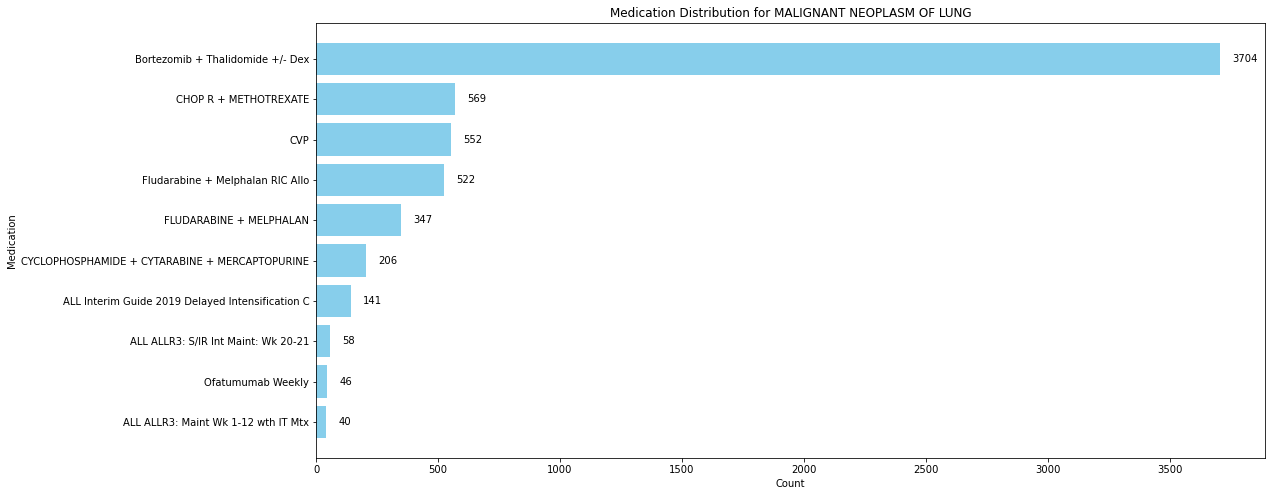

In [118]:
#Visualization for top 10 medication for lung cancer


# Sort the DataFrame by 'Count_x' in descending order
top_10_lungs_regimen = top_10_lungs_regimen.sort_values(by='Count_x', ascending=False)

# Create a bar chart
plt.figure(figsize=(17, 8))
plt.barh(top_10_lungs_regimen['MAPPED_REGIMEN'], top_10_lungs_regimen['Count_x'], color='skyblue')

# Add annotations for counts on the bars
for i, v in enumerate(top_10_lungs_regimen['Count_x']):
    plt.text(v + 50, i, str(int(v)), color='black', va='center')

plt.xlabel('Count')
plt.ylabel('Medication')
plt.title('Medication Distribution for MALIGNANT NEOPLASM OF LUNG')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

plt.show()


In [119]:
#FOR SKIN CANCER

# Choose a unique value from SITE_ICD10_O2_3CHAR to select
unique_value = 'MALIGNANT NEOPLASM OF SKIN'

# Filter the DataFrame to select rows with the chosen unique value in SITE_ICD10_O2_3CHAR
selected_rows = df1[df1['SITE_ICD10_O2_3CHAR'] == unique_value]

# Use drop_duplicates() to remove repeated values in MAPPED_REGIMEN
selected_rows = selected_rows.drop_duplicates(subset='MAPPED_REGIMEN')

# Initialize an empty list to store selected rows as dictionaries
selected_rows_list = []

# Iterate through selected rows and store them as dictionaries in the list
for index, row in selected_rows.iterrows():
    selected_row_dict = {'SITE_ICD10_O2_3CHAR': row['SITE_ICD10_O2_3CHAR'], 
                         'MAPPED_REGIMEN': row['MAPPED_REGIMEN'], 'Count': row['Count']}
    selected_rows_list.append(selected_row_dict)

# Create a new DataFrame from the list of selected rows
skin_regimen = pd.DataFrame(selected_rows_list)

In [120]:
skin_regimen

,SITE_ICD10_O2_3CHAR,MAPPED_REGIMEN,Count
0,MALIGNANT NEOPLASM OF SKIN,NaN,NaN
1,MALIGNANT NEOPLASM OF SKIN,CARBOPLATIN,45689.0
2,MALIGNANT NEOPLASM OF SKIN,Bortezomib + Panobinostat + unknown see comment,81.0
3,MALIGNANT NEOPLASM OF SKIN,CYCLOPHOSPHAMIDE + POMALIDOMIDE,425.0
4,MALIGNANT NEOPLASM OF SKIN,CARFILZOMIB,1037.0
...,...,...,...
1108,MALIGNANT NEOPLASM OF SKIN,ALL UKALL2011 IndB Std Dex (PegAsp),3659.0
1109,MALIGNANT NEOPLASM OF SKIN,MITOTANE,88.0
1110,MALIGNANT NEOPLASM OF SKIN,Dinutuximab Beta,438.0
1111,MALIGNANT NEOPLASM OF SKIN,CYCLOPHOSPHAMIDE + VINORELBINE,540.0


In [121]:
top_10_skin_regimen = skin_regimen['MAPPED_REGIMEN'].value_counts().index[:10]

# Create a new DataFrame to store the selected top 10 mapped regimens
top_10_skin_regimen = skin_regimen[skin_regimen['MAPPED_REGIMEN'].isin(top_10_skin_regimen)]

counts = top_10_skin_regimen['MAPPED_REGIMEN'].value_counts()

# Merge the counts information into the original DataFrame
top_10_skin_regimen = top_10_skin_regimen.merge(counts.rename('Count'), left_on='MAPPED_REGIMEN', right_index=True)


In [122]:
top_10_skin_regimen

,SITE_ICD10_O2_3CHAR,MAPPED_REGIMEN,Count_x,Count_y
1,MALIGNANT NEOPLASM OF SKIN,CARBOPLATIN,45689.0,1
731,MALIGNANT NEOPLASM OF SKIN,NB Low/Interm risk guidelines Carbo/Etop,372.0,1
739,MALIGNANT NEOPLASM OF SKIN,BLEOMYCIN + CISPLATIN + VINCRISTINE,1053.0,1
740,MALIGNANT NEOPLASM OF SKIN,GC EXCRANIAL GERMCELL CBOP/BEP,78.0,1
741,MALIGNANT NEOPLASM OF SKIN,ROVALPITUZUMAB TESIRINE,122.0,1
742,MALIGNANT NEOPLASM OF SKIN,STS Rhabdo VIT0910 Vinc Irino Temoz,509.0,1
743,MALIGNANT NEOPLASM OF SKIN,NORDIC,702.0,1
744,MALIGNANT NEOPLASM OF SKIN,COPP + Dacarbazine,699.0,1
745,MALIGNANT NEOPLASM OF SKIN,AML MyeChild 01 IT Cyt,623.0,1
746,MALIGNANT NEOPLASM OF SKIN,AML MyeChild 01 HD AraC,512.0,1


In [123]:
top_10_skin_regimen = top_10_skin_regimen.drop('Count_y', axis=1)


In [124]:
top_10_skin_regimen

,SITE_ICD10_O2_3CHAR,MAPPED_REGIMEN,Count_x
1,MALIGNANT NEOPLASM OF SKIN,CARBOPLATIN,45689.0
731,MALIGNANT NEOPLASM OF SKIN,NB Low/Interm risk guidelines Carbo/Etop,372.0
739,MALIGNANT NEOPLASM OF SKIN,BLEOMYCIN + CISPLATIN + VINCRISTINE,1053.0
740,MALIGNANT NEOPLASM OF SKIN,GC EXCRANIAL GERMCELL CBOP/BEP,78.0
741,MALIGNANT NEOPLASM OF SKIN,ROVALPITUZUMAB TESIRINE,122.0
742,MALIGNANT NEOPLASM OF SKIN,STS Rhabdo VIT0910 Vinc Irino Temoz,509.0
743,MALIGNANT NEOPLASM OF SKIN,NORDIC,702.0
744,MALIGNANT NEOPLASM OF SKIN,COPP + Dacarbazine,699.0
745,MALIGNANT NEOPLASM OF SKIN,AML MyeChild 01 IT Cyt,623.0
746,MALIGNANT NEOPLASM OF SKIN,AML MyeChild 01 HD AraC,512.0


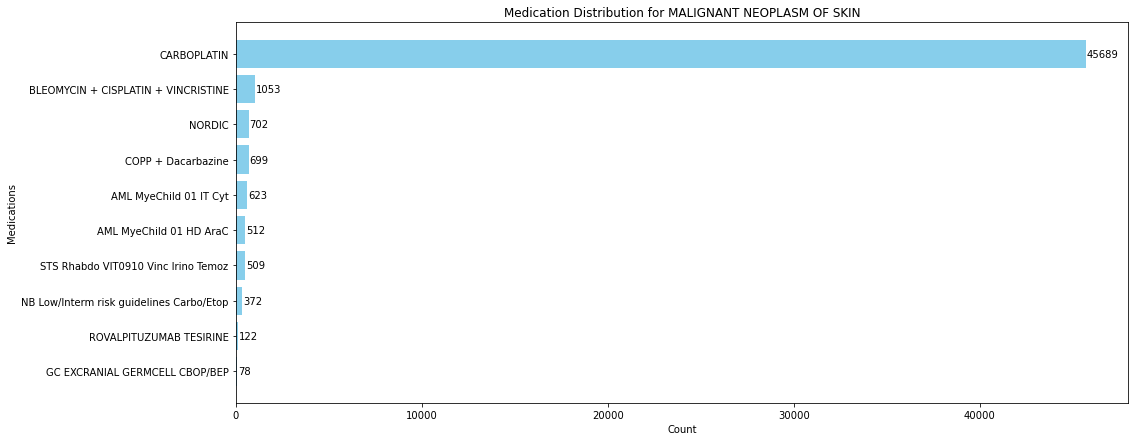

In [125]:
#VISUALIZATION FOR SKIN CANCER

# Sort the DataFrame by 'Count_x' in descending order
top_10_skin_regimen = top_10_skin_regimen.sort_values(by='Count_x', ascending=False)

# Create a bar chart
plt.figure(figsize=(16, 7))
plt.barh(top_10_skin_regimen['MAPPED_REGIMEN'], top_10_skin_regimen['Count_x'], color='skyblue')

# Add annotations for counts on the bars
for i, v in enumerate(top_10_skin_regimen['Count_x']):
    plt.text(v + 50, i, str(int(v)), color='black', va='center')

plt.xlabel('Count')
plt.ylabel('Medications')
plt.title('Medication Distribution for MALIGNANT NEOPLASM OF SKIN')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

plt.show()


In [126]:
# Using the 'value_counts' function to count values in the 'Cancer Type' column
cancer_type_counts = merged_df['SITE_ICD10_O2_3CHAR'].value_counts()

# Create a new DataFrame to store the counts
count_df = pd.DataFrame({'SITE_ICD10_O2_3CHAR': cancer_type_counts.index, 'Count': cancer_type_counts.values})


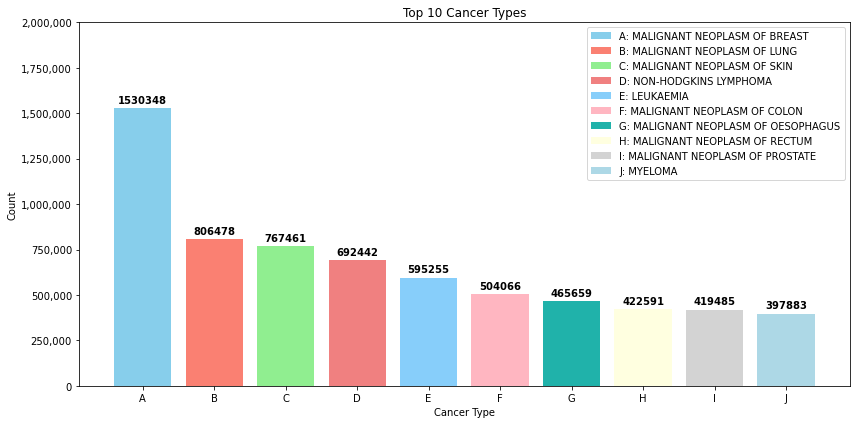

In [127]:
#VISUALIZATION FOR TOP 10 CANCER COUNTS IN UK



import matplotlib.ticker as mticker



# Sample labels for A, B, C, D
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

# Sample colors for bars
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightseagreen', 'lightyellow', 'lightgray', 'lightblue']


# Sort the DataFrame by count in descending order
count_df = count_df.sort_values(by='Count', ascending=False)

# Select the top 10 cancer types
top_10_cancer_types = count_df.head(10)

# Create a bar chart for the top 10 cancer types with different colored bars
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

bars = plt.bar(labels, top_10_cancer_types['Count'], color=colors)

# Set y-axis limit to 2 million
plt.ylim(0, 2000000)

# Set chart title and labels
plt.title('Top 10 Cancer Types')
plt.xlabel('Cancer Type')
plt.ylabel('Count')

# Add cancer names to the legend along with bar colors
legend_labels = {label: f'{label}: {cancer}' for label, cancer in zip(labels, top_10_cancer_types['SITE_ICD10_O2_3CHAR'])}
plt.legend(handles=bars, labels=legend_labels.values(), loc='upper right')

# Add annotations for counts above the bars
for bar, count in zip(bars, top_10_cancer_types['Count']):
    plt.annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10, weight='bold')

# Format y-axis labels to display full numbers
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Show the plot
plt.tight_layout()
plt.show()


In [128]:
filtered_df = merged_df[['SITE_ICD10_O2_3CHAR', 'ETHNICITY']]
filtered_df

,SITE_ICD10_O2_3CHAR,ETHNICITY
0,MALIGNANT NEOPLASM OF SKIN,WHITE BRITISH
1,MALIGNANT NEOPLASM OF SKIN,NaN
2,MALIGNANT NEOPLASM OF SKIN,WHITE BRITISH
3,MALIGNANT NEOPLASM OF SKIN,WHITE BRITISH
4,MALIGNANT NEOPLASM OF SKIN,WHITE BRITISH
...,...,...
10318006,MALIGNANT NEOPLASM OF SMALL INTESTINE,WHITE BRITISH
10318007,MALIGNANT NEOPLASM OF SMALL INTESTINE,WHITE BRITISH
10318008,MALIGNANT NEOPLASM OF SMALL INTESTINE,WHITE BRITISH
10318009,MALIGNANT NEOPLASM OF SMALL INTESTINE,WHITE BRITISH


In [129]:
#FOR LUNG CANCER

lung_cancer_data = filtered_df[filtered_df['SITE_ICD10_O2_3CHAR'] == 'MALIGNANT NEOPLASM OF LUNG']

lung_cancer_data

,SITE_ICD10_O2_3CHAR,ETHNICITY
204780,MALIGNANT NEOPLASM OF LUNG,NaN
204781,MALIGNANT NEOPLASM OF LUNG,NaN
204782,MALIGNANT NEOPLASM OF LUNG,NaN
204783,MALIGNANT NEOPLASM OF LUNG,NaN
204784,MALIGNANT NEOPLASM OF LUNG,NaN
...,...,...
10317755,MALIGNANT NEOPLASM OF LUNG,ASIAN PAKISTANI
10317756,MALIGNANT NEOPLASM OF LUNG,ASIAN PAKISTANI
10317757,MALIGNANT NEOPLASM OF LUNG,ASIAN PAKISTANI
10317758,MALIGNANT NEOPLASM OF LUNG,ASIAN PAKISTANI


In [130]:
# Counting the ethnicity calues and Removing duplicate values in the "ETHNICITY" column

lung_cancer_data['count'] = lung_cancer_data.groupby('ETHNICITY')['ETHNICITY'].transform('count')

lung_ethnicity = lung_cancer_data.drop_duplicates(subset=['ETHNICITY'])

lung_ethnicity

C:\Users\saini\AppData\Local\Temp\ipykernel_12944\1569143343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lung_cancer_data['count'] = lung_cancer_data.groupby('ETHNICITY')['ETHNICITY'].transform('count')


,SITE_ICD10_O2_3CHAR,ETHNICITY,count
204780,MALIGNANT NEOPLASM OF LUNG,NaN,NaN
204873,MALIGNANT NEOPLASM OF LUNG,WHITE BRITISH,699622.0
204909,MALIGNANT NEOPLASM OF LUNG,NOT STATED,22896.0
218911,MALIGNANT NEOPLASM OF LUNG,C ANY OTHER WHITE BACKGROUND,24054.0
226864,MALIGNANT NEOPLASM OF LUNG,WHITE IRISH,8724.0
233689,MALIGNANT NEOPLASM OF LUNG,S ANY OTHER ETHNIC GROUP,8846.0
246946,MALIGNANT NEOPLASM OF LUNG,L ANY OTHER ASIAN BACKGROUND,3763.0
292283,MALIGNANT NEOPLASM OF LUNG,X NOT KNOWN,3062.0
293460,MALIGNANT NEOPLASM OF LUNG,G ANY OTHER MIXED BACKGROUND,1379.0
307049,MALIGNANT NEOPLASM OF LUNG,P ANY OTHER BLACK BACKGROUND,2233.0


In [131]:



# Combine and sum rows
combine_ethnicities = ["S ANY OTHER ETHNIC GROUP", "L ANY OTHER ASIAN BACKGROUND",
                       "C ANY OTHER WHITE BACKGROUND", "G ANY OTHER MIXED BACKGROUND",
                       "P ANY OTHER BLACK BACKGROUND"]
combined_count = lung_ethnicity[lung_ethnicity["ETHNICITY"].isin(combine_ethnicities)]["count"].sum()

# Create a new DataFrame with the combined row
new_row = pd.DataFrame({
    "SITE_ICD10_O2_3CHAR": ["MALIGNANT NEOPLASM OF BREAST"],
    "ETHNICITY": ["Other Background"],
    "count": [combined_count]
})

# Concatenate the new row with the original DataFrame
lung_ethnicity = pd.concat([lung_ethnicity, new_row], ignore_index=True)

# Remove the rows that have been combined
lung_ethnicity = lung_ethnicity[~lung_ethnicity["ETHNICITY"].isin(combine_ethnicities)]




In [132]:
lung_ethnicity

,SITE_ICD10_O2_3CHAR,ETHNICITY,count
0,MALIGNANT NEOPLASM OF LUNG,NaN,NaN
1,MALIGNANT NEOPLASM OF LUNG,WHITE BRITISH,699622.0
2,MALIGNANT NEOPLASM OF LUNG,NOT STATED,22896.0
4,MALIGNANT NEOPLASM OF LUNG,WHITE IRISH,8724.0
7,MALIGNANT NEOPLASM OF LUNG,X NOT KNOWN,3062.0
10,MALIGNANT NEOPLASM OF LUNG,ASIAN INDIAN,5689.0
11,MALIGNANT NEOPLASM OF LUNG,BLACK AFRICAN,2648.0
12,MALIGNANT NEOPLASM OF LUNG,BLACK CARIBBEAN,5115.0
13,MALIGNANT NEOPLASM OF LUNG,ASIAN PAKISTANI,3489.0
14,MALIGNANT NEOPLASM OF LUNG,ASIAN BANGLADESHI,1814.0


In [133]:
# Remove rows by index (rows 0 and 16)
lung_ethnicity = lung_ethnicity.drop([0,], axis=0)

# Reset the index
lung_ethnicity.reset_index(drop=True, inplace=True)

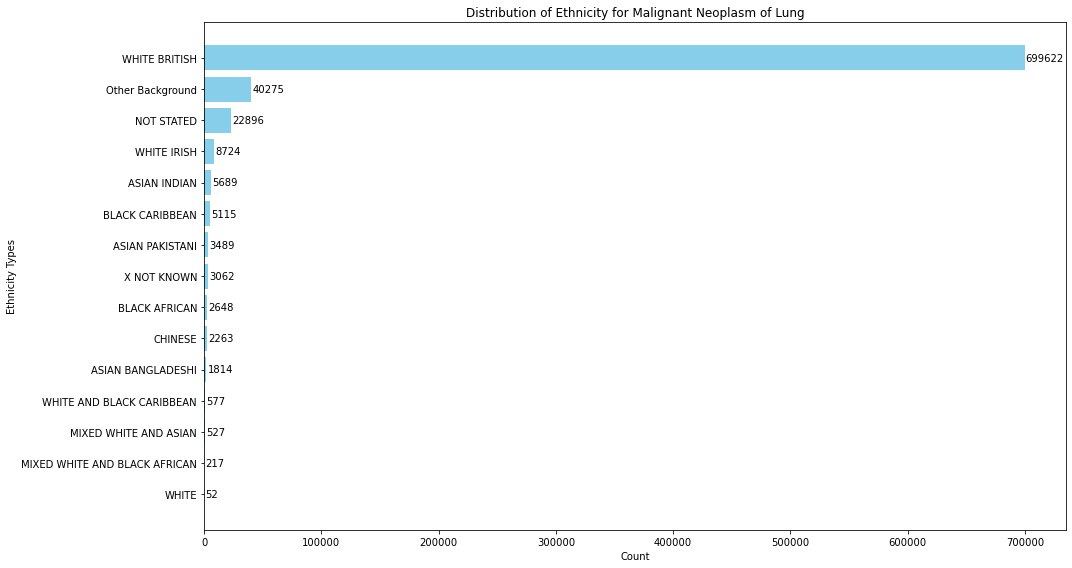

In [134]:
import matplotlib.pyplot as plt


lung_ethnicity = lung_ethnicity.sort_values(by='count', ascending=True)
# Create a horizontal bar chart
plt.figure(figsize=(15, 8))
plt.barh(lung_ethnicity['ETHNICITY'], lung_ethnicity['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Ethnicity Types')
plt.title('Distribution of Ethnicity for Malignant Neoplasm of Lung')

# Add annotations
for i, count in enumerate(lung_ethnicity['count']):
    plt.text(count + 1000, i, str(int(count)), va='center')

# Show the plot
plt.tight_layout()
plt.show()

In [135]:
#FOR BREAST CANCER


breast_cancer_data = filtered_df[filtered_df['SITE_ICD10_O2_3CHAR'] == 'MALIGNANT NEOPLASM OF BREAST']

breast_cancer_data

,SITE_ICD10_O2_3CHAR,ETHNICITY
346157,MALIGNANT NEOPLASM OF BREAST,NaN
349382,MALIGNANT NEOPLASM OF BREAST,WHITE BRITISH
349383,MALIGNANT NEOPLASM OF BREAST,WHITE BRITISH
349384,MALIGNANT NEOPLASM OF BREAST,WHITE BRITISH
349385,MALIGNANT NEOPLASM OF BREAST,WHITE BRITISH
...,...,...
10315194,MALIGNANT NEOPLASM OF BREAST,WHITE BRITISH
10315195,MALIGNANT NEOPLASM OF BREAST,WHITE BRITISH
10315196,MALIGNANT NEOPLASM OF BREAST,WHITE BRITISH
10315197,MALIGNANT NEOPLASM OF BREAST,WHITE BRITISH


In [136]:
breast_cancer_data['count'] = breast_cancer_data.groupby('ETHNICITY')['ETHNICITY'].transform('count')

# Remove duplicate values in the "ETHNICITY" column
breast_ethnicity = breast_cancer_data.drop_duplicates(subset=['ETHNICITY'])
breast_ethnicity

C:\Users\saini\AppData\Local\Temp\ipykernel_12944\2818923041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breast_cancer_data['count'] = breast_cancer_data.groupby('ETHNICITY')['ETHNICITY'].transform('count')


,SITE_ICD10_O2_3CHAR,ETHNICITY,count
346157,MALIGNANT NEOPLASM OF BREAST,NaN,NaN
349382,MALIGNANT NEOPLASM OF BREAST,WHITE BRITISH,1247695.0
376196,MALIGNANT NEOPLASM OF BREAST,S ANY OTHER ETHNIC GROUP,23582.0
383106,MALIGNANT NEOPLASM OF BREAST,WHITE IRISH,10539.0
385675,MALIGNANT NEOPLASM OF BREAST,X NOT KNOWN,8529.0
390670,MALIGNANT NEOPLASM OF BREAST,L ANY OTHER ASIAN BACKGROUND,12409.0
391305,MALIGNANT NEOPLASM OF BREAST,C ANY OTHER WHITE BACKGROUND,60400.0
391319,MALIGNANT NEOPLASM OF BREAST,NOT STATED,65335.0
395804,MALIGNANT NEOPLASM OF BREAST,G ANY OTHER MIXED BACKGROUND,4950.0
401851,MALIGNANT NEOPLASM OF BREAST,ASIAN INDIAN,22134.0


In [137]:



# Combine and sum rows
combine_ethnicities = ["S ANY OTHER ETHNIC GROUP", "L ANY OTHER ASIAN BACKGROUND",
                       "C ANY OTHER WHITE BACKGROUND", "G ANY OTHER MIXED BACKGROUND",
                       "P ANY OTHER BLACK BACKGROUND"]
combined_count = breast_ethnicity[breast_ethnicity["ETHNICITY"].isin(combine_ethnicities)]["count"].sum()

# Create a new DataFrame with the combined row
new_row = pd.DataFrame({
    "SITE_ICD10_O2_3CHAR": ["MALIGNANT NEOPLASM OF BREAST"],
    "ETHNICITY": ["Other Background"],
    "count": [combined_count]
})

# Concatenate the new row with the original DataFrame
breast_ethnicity = pd.concat([breast_ethnicity, new_row], ignore_index=True)

# Remove the rows that have been combined
breast_ethnicity = breast_ethnicity[~breast_ethnicity["ETHNICITY"].isin(combine_ethnicities)]




In [138]:
# Remove rows by index (rows 0 and 16)
breast_ethnicity = breast_ethnicity.drop([0,], axis=0)

# Reset the index
breast_ethnicity.reset_index(drop=True, inplace=True)

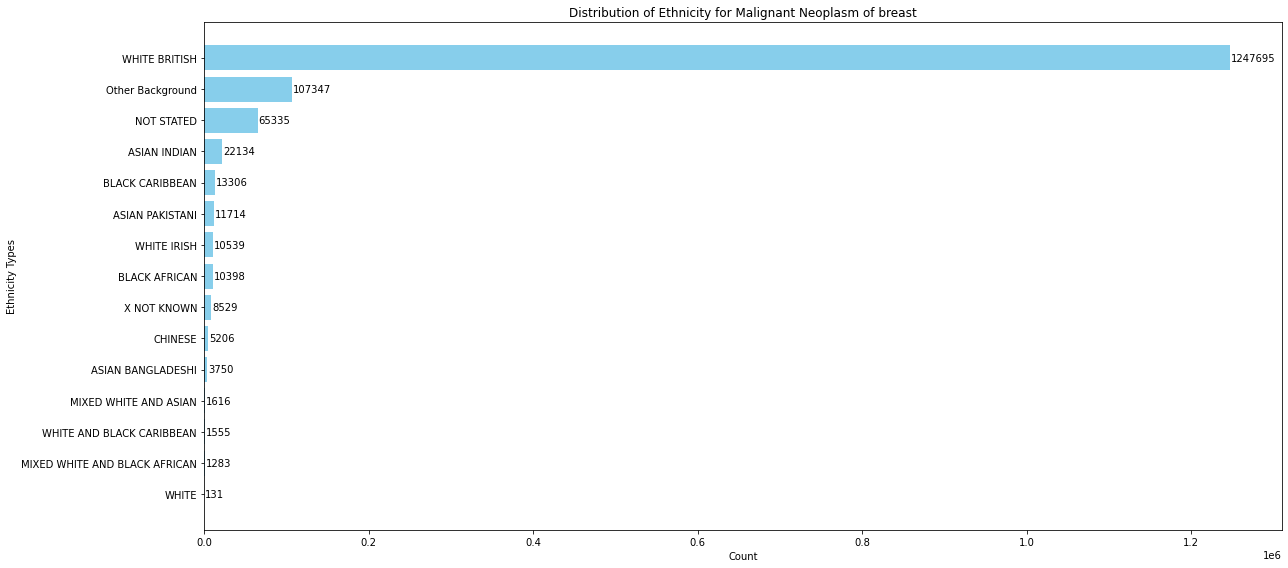

In [139]:

breast_ethnicity = breast_ethnicity.sort_values(by='count', ascending=True)
# Create a horizontal bar chart
plt.figure(figsize=(18, 8))
plt.barh(breast_ethnicity['ETHNICITY'], breast_ethnicity['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Ethnicity Types')
plt.title('Distribution of Ethnicity for Malignant Neoplasm of breast')

# Add annotations
for i, count in enumerate(breast_ethnicity['count']):
    plt.text(count + 1000, i, str(int(count)), va='center')

# Show the plot
plt.tight_layout()
plt.show()

In [140]:
#FOR SKIN CANCER


skin_cancer_data = filtered_df[filtered_df['SITE_ICD10_O2_3CHAR'] == 'MALIGNANT NEOPLASM OF SKIN']

skin_cancer_data

,SITE_ICD10_O2_3CHAR,ETHNICITY
0,MALIGNANT NEOPLASM OF SKIN,WHITE BRITISH
1,MALIGNANT NEOPLASM OF SKIN,NaN
2,MALIGNANT NEOPLASM OF SKIN,WHITE BRITISH
3,MALIGNANT NEOPLASM OF SKIN,WHITE BRITISH
4,MALIGNANT NEOPLASM OF SKIN,WHITE BRITISH
...,...,...
10317958,MALIGNANT NEOPLASM OF SKIN,WHITE BRITISH
10317959,MALIGNANT NEOPLASM OF SKIN,WHITE BRITISH
10317960,MALIGNANT NEOPLASM OF SKIN,WHITE BRITISH
10317961,MALIGNANT NEOPLASM OF SKIN,WHITE BRITISH


In [141]:
skin_cancer_data['ETHNICITY'].value_counts

<bound method IndexOpsMixin.value_counts of 0           WHITE BRITISH
1                     NaN
2           WHITE BRITISH
3           WHITE BRITISH
4           WHITE BRITISH
                ...      
10317958    WHITE BRITISH
10317959    WHITE BRITISH
10317960    WHITE BRITISH
10317961    WHITE BRITISH
10317962    WHITE BRITISH
Name: ETHNICITY, Length: 767461, dtype: object>

In [142]:

skin_cancer_data['count'] = skin_cancer_data.groupby('ETHNICITY')['ETHNICITY'].transform('count')

# Remove duplicate values in the "ETHNICITY" column
skin_ethnicity = skin_cancer_data.drop_duplicates(subset=['ETHNICITY'])
skin_ethnicity

C:\Users\saini\AppData\Local\Temp\ipykernel_12944\3521517764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skin_cancer_data['count'] = skin_cancer_data.groupby('ETHNICITY')['ETHNICITY'].transform('count')


,SITE_ICD10_O2_3CHAR,ETHNICITY,count
0,MALIGNANT NEOPLASM OF SKIN,WHITE BRITISH,626079.0
1,MALIGNANT NEOPLASM OF SKIN,NaN,NaN
26,MALIGNANT NEOPLASM OF SKIN,NOT STATED,27267.0
59,MALIGNANT NEOPLASM OF SKIN,WHITE IRISH,6667.0
77,MALIGNANT NEOPLASM OF SKIN,X NOT KNOWN,7571.0
122,MALIGNANT NEOPLASM OF SKIN,C ANY OTHER WHITE BACKGROUND,20049.0
630,MALIGNANT NEOPLASM OF SKIN,CHINESE,588.0
676,MALIGNANT NEOPLASM OF SKIN,S ANY OTHER ETHNIC GROUP,5063.0
1041,MALIGNANT NEOPLASM OF SKIN,ASIAN INDIAN,2116.0
1560,MALIGNANT NEOPLASM OF SKIN,BLACK AFRICAN,993.0


In [143]:



# Combine and sum rows
combine_ethnicities = ["S ANY OTHER ETHNIC GROUP", "L ANY OTHER ASIAN BACKGROUND",
                       "C ANY OTHER WHITE BACKGROUND", "G ANY OTHER MIXED BACKGROUND",
                       "P ANY OTHER BLACK BACKGROUND"]
combined_count = skin_ethnicity[skin_ethnicity["ETHNICITY"].isin(combine_ethnicities)]["count"].sum()

# Create a new DataFrame with the combined row
new_row = pd.DataFrame({
    "SITE_ICD10_O2_3CHAR": ["MALIGNANT NEOPLASM OF skin"],
    "ETHNICITY": ["Other Background"],
    "count": [combined_count]
})

# Concatenate the new row with the original DataFrame
skin_ethnicity = pd.concat([skin_ethnicity, new_row], ignore_index=True)

# Remove the rows that have been combined
skin_ethnicity = skin_ethnicity[~skin_ethnicity["ETHNICITY"].isin(combine_ethnicities)]




In [144]:
# Remove rows by index (rows 0 and 16)
skin_ethnicity = skin_ethnicity.drop([1], axis=0)

# Reset the index
skin_ethnicity.reset_index(drop=True, inplace=True)

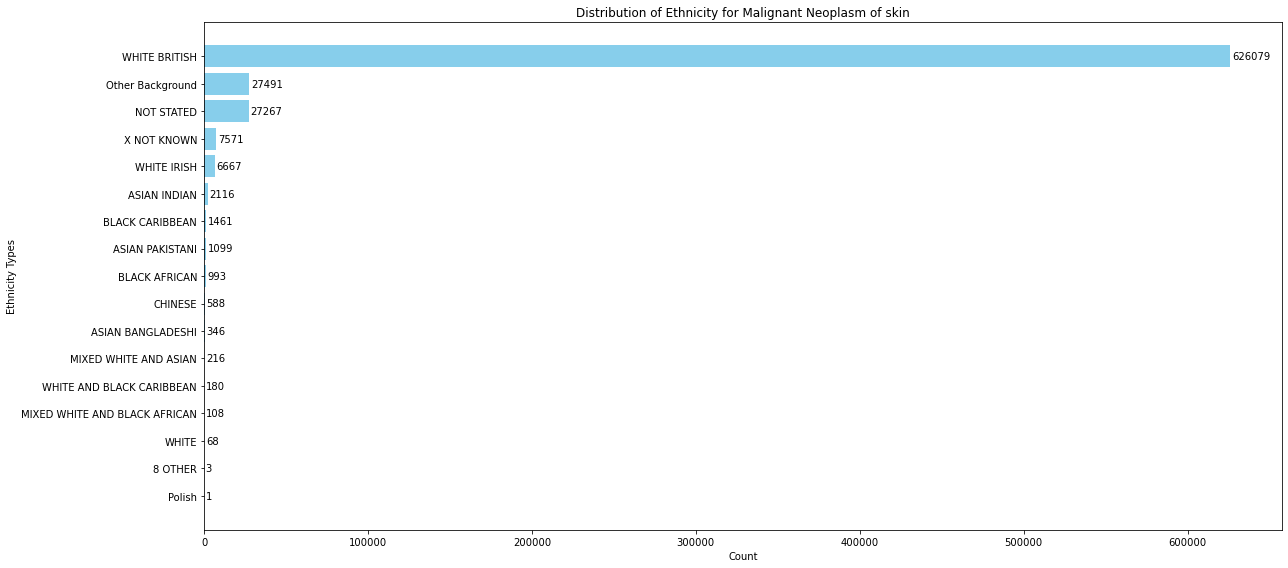

In [145]:


skin_ethnicity = skin_ethnicity.sort_values(by='count', ascending=True)
# Create a horizontal bar chart
plt.figure(figsize=(18, 8))
plt.barh(skin_ethnicity['ETHNICITY'], skin_ethnicity['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Ethnicity Types')
plt.title('Distribution of Ethnicity for Malignant Neoplasm of skin')

# Add annotations
for i, count in enumerate(skin_ethnicity['count']):
    plt.text(count + 1000, i, str(int(count)), va='center')

# Show the plot
plt.tight_layout()
plt.show()

In [146]:
#Workload for GENDER ADN CANCER TYPES

gender_filtered_df = merged_df[['SITE_ICD10_O2_3CHAR', 'GENDER']]
gender_filtered_df

,SITE_ICD10_O2_3CHAR,GENDER
0,MALIGNANT NEOPLASM OF SKIN,Male
1,MALIGNANT NEOPLASM OF SKIN,Male
2,MALIGNANT NEOPLASM OF SKIN,Female
3,MALIGNANT NEOPLASM OF SKIN,Male
4,MALIGNANT NEOPLASM OF SKIN,Male
...,...,...
10318006,MALIGNANT NEOPLASM OF SMALL INTESTINE,Female
10318007,MALIGNANT NEOPLASM OF SMALL INTESTINE,Female
10318008,MALIGNANT NEOPLASM OF SMALL INTESTINE,Female
10318009,MALIGNANT NEOPLASM OF SMALL INTESTINE,Female


In [147]:
top_10_sites = gender_filtered_df['SITE_ICD10_O2_3CHAR'].value_counts().head(10)

In [148]:
top_10_sites

MALIGNANT NEOPLASM OF BREAST        1530348
MALIGNANT NEOPLASM OF LUNG           806478
MALIGNANT NEOPLASM OF SKIN           767461
NON-HODGKINS LYMPHOMA                692442
LEUKAEMIA                            595255
MALIGNANT NEOPLASM OF COLON          504066
MALIGNANT NEOPLASM OF OESOPHAGUS     465659
MALIGNANT NEOPLASM OF RECTUM         422591
MALIGNANT NEOPLASM OF PROSTATE       419485
MYELOMA                              397883
Name: SITE_ICD10_O2_3CHAR, dtype: int64

In [149]:

# Get the top 10 most repeated values in SITE_ICD10_O2_3CHAR
top_10_sites = gender_filtered_df['SITE_ICD10_O2_3CHAR'].value_counts().head(10).index.tolist()

# Create an empty list to store DataFrames
gender_counts = []

# Iterate through the top 10 sites and count males and females
for site in top_10_sites:
    subset = gender_filtered_df[gender_filtered_df['SITE_ICD10_O2_3CHAR'] == site]
    male_count = subset[subset['GENDER'] == 'Male']['GENDER'].count()
    female_count = subset[subset['GENDER'] == 'Female']['GENDER'].count()
    
    # Create a DataFrame for each site
    site_gender_filtered_df = pd.DataFrame({'SITE_ICD10_O2_3CHAR': [site], 'Male': [male_count], 'Female': [female_count]})
    
    gender_counts.append(site_gender_filtered_df)

# Concatenate the DataFrames into a single DataFrame
cancer_gender_count = pd.concat(gender_counts, ignore_index=True)




In [150]:
cancer_gender_count

,SITE_ICD10_O2_3CHAR,Male,Female
0,MALIGNANT NEOPLASM OF BREAST,31822,1498526
1,MALIGNANT NEOPLASM OF LUNG,422688,383790
2,MALIGNANT NEOPLASM OF SKIN,428146,339315
3,NON-HODGKINS LYMPHOMA,392600,299842
4,LEUKAEMIA,333266,261989
5,MALIGNANT NEOPLASM OF COLON,284036,220030
6,MALIGNANT NEOPLASM OF OESOPHAGUS,262654,203005
7,MALIGNANT NEOPLASM OF RECTUM,235016,187575
8,MALIGNANT NEOPLASM OF PROSTATE,398166,21319
9,MYELOMA,227302,170581


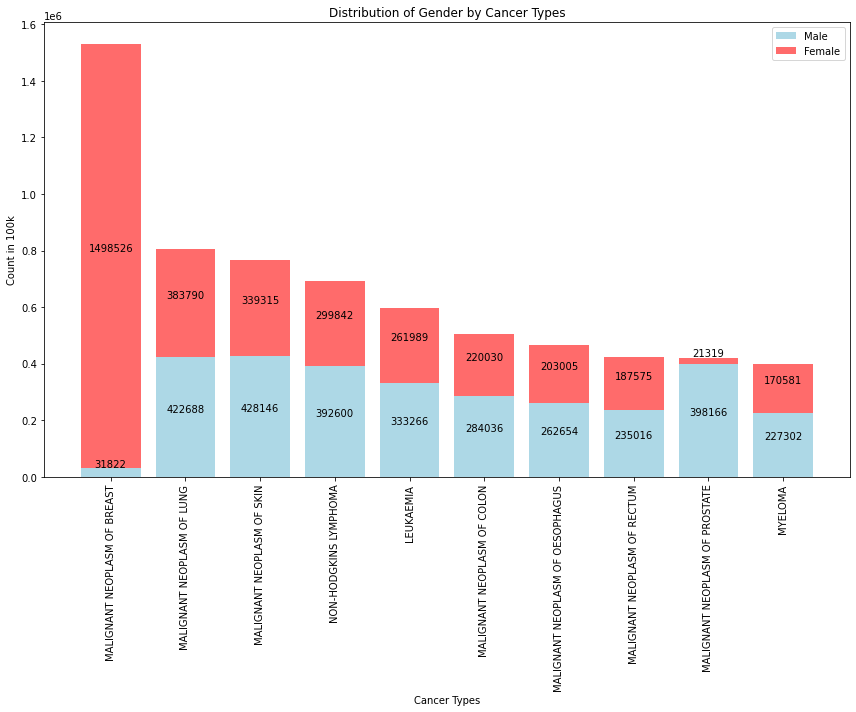

In [151]:


# Create a stacked bar chart
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

# Define colors
colors = ['#ADD8E6', '#FF6B6B']

# Plot the data
bars1 = plt.bar(cancer_gender_count['SITE_ICD10_O2_3CHAR'], cancer_gender_count['Male'], color=colors[0], label='Male')
bars2 = plt.bar(cancer_gender_count['SITE_ICD10_O2_3CHAR'], cancer_gender_count['Female'], bottom=cancer_gender_count['Male'], color=colors[1], label='Female')

# Add labels and title
plt.xlabel('Cancer Types')
plt.ylabel('Count in 100k')
plt.title('Distribution of Gender by Cancer Types')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()

# Add annotations for males and females
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    plt.annotate(f'{height1}',
                 xy=(bar1.get_x() + bar1.get_width() / 2, height1 / 2),
                 xytext=(0, 3),  # 3 points vertical offset for male annotation
                 textcoords="offset points",
                 ha='center', va='bottom')
    plt.annotate(f'{height2}',
                 xy=(bar2.get_x() + bar2.get_width() / 2, height1 + height2 / 2),
                 xytext=(0, 3),  # 3 points vertical offset for female annotation
                 textcoords="offset points",
                 ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


In [152]:
#REQUIREMENT: MEDICATION DOSAGE FOR TOP # CANCER TYPE

cancer_regimen_dosage = merged_df[['SITE_ICD10_O2_3CHAR', 'MAPPED_REGIMEN', 'ACTUAL_DOSE_PER_ADMINISTRATION']]
cancer_regimen_dosage

,SITE_ICD10_O2_3CHAR,MAPPED_REGIMEN,ACTUAL_DOSE_PER_ADMINISTRATION
0,MALIGNANT NEOPLASM OF SKIN,NaN,NaN
1,MALIGNANT NEOPLASM OF SKIN,NaN,NaN
2,MALIGNANT NEOPLASM OF SKIN,NaN,NaN
3,MALIGNANT NEOPLASM OF SKIN,NaN,NaN
4,MALIGNANT NEOPLASM OF SKIN,NaN,NaN
...,...,...,...
10318006,MALIGNANT NEOPLASM OF SMALL INTESTINE,Paclitaxel Priming,0.0
10318007,MALIGNANT NEOPLASM OF SMALL INTESTINE,Paclitaxel Priming,2200.0
10318008,MALIGNANT NEOPLASM OF SMALL INTESTINE,Paclitaxel Priming,1368.0
10318009,MALIGNANT NEOPLASM OF SMALL INTESTINE,Paclitaxel Priming,0.0


In [153]:
df = cancer_regimen_dosage[cancer_regimen_dosage['SITE_ICD10_O2_3CHAR'] == 'MALIGNANT NEOPLASM OF BREAST']



In [154]:

# Replace 'MAPPED_REGIMEN' and 'ACTUAL_DOSE_PER_ADMINISTRATION' with your actual column names
unique_regimens = df['MAPPED_REGIMEN'].unique()

# Create a dictionary to store the results
result_dict = {'MAPPED_REGIMEN': [], 'Average_ACTUAL_DOSE': []}

# Iterate through unique regimens and calculate the average
for regimen in unique_regimens:
    if pd.notna(regimen):  # Exclude NaN values in 'MAPPED_REGIMEN'
        avg_dose = df[df['MAPPED_REGIMEN'] == regimen]['ACTUAL_DOSE_PER_ADMINISTRATION'].mean()
        result_dict['MAPPED_REGIMEN'].append(regimen)
        result_dict['Average_ACTUAL_DOSE'].append(avg_dose)

# Create a DataFrame from the dictionary
result_df = pd.DataFrame(result_dict)





In [155]:
result_df

,MAPPED_REGIMEN,Average_ACTUAL_DOSE
0,NAB PACLITAXEL,396.004266
1,CYTARABINE + DAUNORUBICIN,388.954545
2,CHOP R,487.645329
3,Cisplatin + Radiotherapy,431.336350
4,Cladribine + Rituximab,629.892000
...,...,...
976,BEVACIZUMAB + CARBO,211.250000
977,CYTARABINE + DAUNORUBICIN + Gemtuzumab Ozogamicin,160.000000
978,Alemtuz+Fludara+Melphalan RIC MUD,1176.666667
979,"WT SIOP 2002 01 post op Carbo, Etop",431.800000


In [156]:
breast_regimen_dosage = result_df.nlargest(10, 'Average_ACTUAL_DOSE')
breast_regimen_dosage

,MAPPED_REGIMEN,Average_ACTUAL_DOSE
267,ST03 TRIAL,56000.000000
319,CISPLATIN + DOXORUBICIN + FLUOROURACIL + VINC...,18923.625000
772,BORTEZOMIB + DOXORUBICIN,11200.000000
618,CEMIPLIMAB,10120.285714
472,DA 3+8,9534.111111
322,STS Rhabdomyosarcoma RMS 2005 VA,6143.833333
834,BENDAMUSTINE + BORTEZOMIB,5601.250000
80,CTD (Thalidomide 100mg),4077.578889
712,CYTARABINE + IDARUBICIN + METHOTREXATE + RITUX...,3813.000000
965,EURAMOS TRIAL,3771.100000


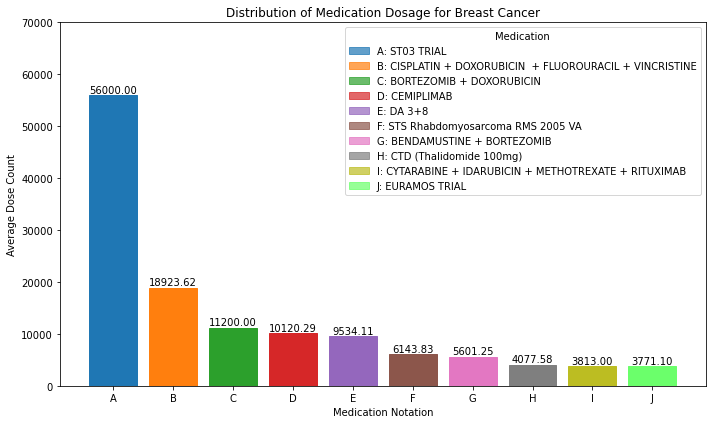

In [157]:


# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart with notations
notations = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
bars = plt.bar(notations, breast_regimen_dosage['Average_ACTUAL_DOSE'], color='skyblue')

# Define custom colors for bars
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#6BFF6B']

for i, bar in enumerate(bars):
    bar.set_color(custom_colors[i])

# Add annotations to the bars
for i, Average_ACTUAL_DOSE in enumerate(breast_regimen_dosage['Average_ACTUAL_DOSE']):
    plt.text(i, Average_ACTUAL_DOSE + 20, f"{Average_ACTUAL_DOSE:.2f}", ha='center', va='bottom', fontsize=10)

# Create a legend mapping notations to "Notation: Medication Name"
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=custom_colors[i], alpha=0.7, label=f"{notation}: {medication}")
                  for i, (notation, medication) in enumerate(zip(notations, breast_regimen_dosage['MAPPED_REGIMEN']))]
plt.legend(handles=legend_handles, title="Medication")

# Set y-axis limit to 1500
plt.ylim(0, 70000)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha="center")

# Set axis labels and title
plt.xlabel("Medication Notation")
plt.ylabel("Average Dose Count")
plt.title("Distribution of Medication Dosage for Breast Cancer")

# Show the plot
plt.tight_layout()
plt.show()


In [158]:
# For lung cancer

df2 = cancer_regimen_dosage[cancer_regimen_dosage['SITE_ICD10_O2_3CHAR'] == 'MALIGNANT NEOPLASM OF LUNG']

df2

,SITE_ICD10_O2_3CHAR,MAPPED_REGIMEN,ACTUAL_DOSE_PER_ADMINISTRATION
204780,MALIGNANT NEOPLASM OF LUNG,Ofatumumab Weekly,0.0
204781,MALIGNANT NEOPLASM OF LUNG,Ofatumumab Weekly,67.5
204782,MALIGNANT NEOPLASM OF LUNG,LORLATINIB,350.0
204783,MALIGNANT NEOPLASM OF LUNG,Eribulin,350.0
204784,MALIGNANT NEOPLASM OF LUNG,Eribulin,1580.0
...,...,...,...
10317755,MALIGNANT NEOPLASM OF LUNG,FLUOROURACIL + MITOMYCIN + RT,NaN
10317756,MALIGNANT NEOPLASM OF LUNG,FLUOROURACIL + MITOMYCIN + RT,10.0
10317757,MALIGNANT NEOPLASM OF LUNG,FLUOROURACIL + MITOMYCIN + RT,500.0
10317758,MALIGNANT NEOPLASM OF LUNG,FLUOROURACIL + MITOMYCIN + RT,240.0


In [159]:

# Replace 'MAPPED_REGIMEN' and 'ACTUAL_DOSE_PER_ADMINISTRATION' with your actual column names
unique_regimens = df2['MAPPED_REGIMEN'].unique()

# Create a dictionary to store the results
result_dict = {'MAPPED_REGIMEN': [], 'Average_DOSE': []}

# Iterate through unique regimens and calculate the average
for regimen in unique_regimens:
    if pd.notna(regimen):  # Exclude NaN values in 'MAPPED_REGIMEN'
        avg_dose = df2[df2['MAPPED_REGIMEN'] == regimen]['ACTUAL_DOSE_PER_ADMINISTRATION'].mean()
        result_dict['MAPPED_REGIMEN'].append(regimen)
        result_dict['Average_DOSE'].append(avg_dose)

# Create a DataFrame from the dictionary
result_df2 = pd.DataFrame(result_dict)


result_df2


,MAPPED_REGIMEN,Average_DOSE
0,Ofatumumab Weekly,33.750000
1,LORLATINIB,383.878671
2,Eribulin,370.919817
3,Durvalumab,411.430671
4,RIALTO TRIAL,474.566667
...,...,...
1233,DA,NaN
1234,R CODOX M,NaN
1235,CYTARABINE + FLUDARABINE,NaN
1236,GEMTUZUMAB OZOGAMICIN,NaN


In [160]:
lung_regimen_dosage = result_df2.nlargest(10, 'Average_DOSE')


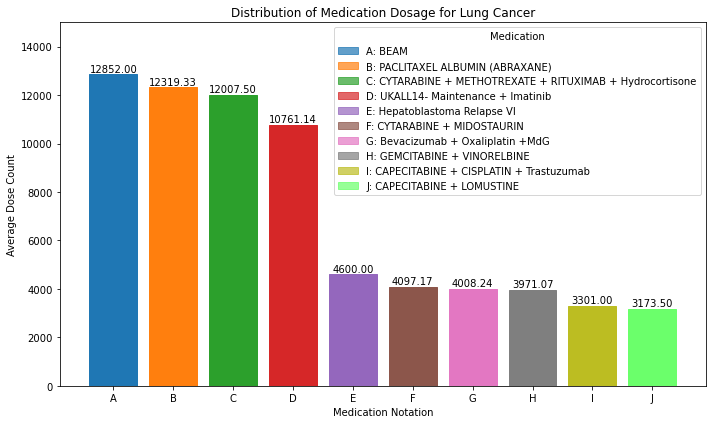

In [161]:


# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart with notations
notations = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
bars = plt.bar(notations, lung_regimen_dosage['Average_DOSE'], color='skyblue')

# Define custom colors for bars
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#6BFF6B']

for i, bar in enumerate(bars):
    bar.set_color(custom_colors[i])

# Add annotations to the bars
for i, Average_DOSE in enumerate(lung_regimen_dosage['Average_DOSE']):
    plt.text(i, Average_DOSE + 20, f"{Average_DOSE:.2f}", ha='center', va='bottom', fontsize=10)

# Create a legend mapping notations to "Notation: Medication Name"
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=custom_colors[i], alpha=0.7, label=f"{notation}: {medication}")
                  for i, (notation, medication) in enumerate(zip(notations, lung_regimen_dosage['MAPPED_REGIMEN']))]
plt.legend(handles=legend_handles, title="Medication")

# Set y-axis limit to 15000
plt.ylim(0, 15000)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha="center")

# Set axis labels and title
plt.xlabel("Medication Notation")
plt.ylabel("Average Dose Count")
plt.title("Distribution of Medication Dosage for Lung Cancer")

# Show the plot
plt.tight_layout()
plt.show()


In [162]:
# For skin cancer

df3 = cancer_regimen_dosage[cancer_regimen_dosage['SITE_ICD10_O2_3CHAR'] == 'MALIGNANT NEOPLASM OF SKIN']

df3

,SITE_ICD10_O2_3CHAR,MAPPED_REGIMEN,ACTUAL_DOSE_PER_ADMINISTRATION
0,MALIGNANT NEOPLASM OF SKIN,NaN,NaN
1,MALIGNANT NEOPLASM OF SKIN,NaN,NaN
2,MALIGNANT NEOPLASM OF SKIN,NaN,NaN
3,MALIGNANT NEOPLASM OF SKIN,NaN,NaN
4,MALIGNANT NEOPLASM OF SKIN,NaN,NaN
...,...,...,...
10317958,MALIGNANT NEOPLASM OF SKIN,NaN,8.0
10317959,MALIGNANT NEOPLASM OF SKIN,NaN,1200.0
10317960,MALIGNANT NEOPLASM OF SKIN,NaN,270.0
10317961,MALIGNANT NEOPLASM OF SKIN,NaN,240.0


In [163]:

# Replace 'MAPPED_REGIMEN' and 'ACTUAL_DOSE_PER_ADMINISTRATION' with your actual column names
unique_regimens = df3['MAPPED_REGIMEN'].unique()

# Create a dictionary to store the results
result_dict = {'MAPPED_REGIMEN': [], 'Average_DOSE': []}

# Iterate through unique regimens and calculate the average
for regimen in unique_regimens:
    if pd.notna(regimen):  # Exclude NaN values in 'MAPPED_REGIMEN'
        avg_dose = df3[df3['MAPPED_REGIMEN'] == regimen]['ACTUAL_DOSE_PER_ADMINISTRATION'].mean()
        result_dict['MAPPED_REGIMEN'].append(regimen)
        result_dict['Average_DOSE'].append(avg_dose)

# Create a DataFrame from the dictionary
result_df3 = pd.DataFrame(result_dict)



result_df3

,MAPPED_REGIMEN,Average_DOSE
0,CARBOPLATIN,385.027496
1,Bortezomib + Panobinostat + unknown see comment,768.659091
2,CYCLOPHOSPHAMIDE + POMALIDOMIDE,474.667778
3,CARFILZOMIB,261.898095
4,CARBOPLATIN + ETOPOSIDE,512.580460
...,...,...
1107,ALL UKALL2011 IndB Std Dex (PegAsp),NaN
1108,MITOTANE,498.166667
1109,Dinutuximab Beta,403.027273
1110,CYCLOPHOSPHAMIDE + VINORELBINE,200.000000


In [164]:
skin_regimen_dosage = result_df3.nlargest(10, 'Average_DOSE')
skin_regimen_dosage

,MAPPED_REGIMEN,Average_DOSE
347,CTD (Thalidomide 100mg),6893.736842
553,Bendamustine + Thalidomide +/- Dex,6714.013889
663,Fluorouracil + Folinic + RT Bossett,6226.750000
385,CYCLOPHOSPHAMIDE + FILGRASTIM,4788.625000
1013,FOCUS4 TRIAL,4534.500000
623,Epirubicin intravesical,4256.714286
1093,CISPLATIN + DOXORUBICIN + METHOTREXATE,4203.872727
680,Cetuximab + Oxaliplatin + MdG Load,3815.322449
917,CYTARABINE + IDARUBICIN + METHOTREXATE + RITUX...,3813.000000
158,DHAP,3767.875532


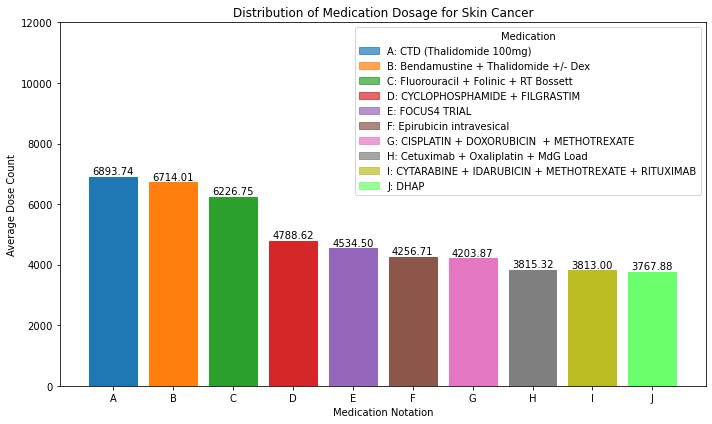

In [165]:


# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart with notations
notations = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
bars = plt.bar(notations, skin_regimen_dosage['Average_DOSE'], color='skyblue')

# Define custom colors for bars
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#6BFF6B']

for i, bar in enumerate(bars):
    bar.set_color(custom_colors[i])

# Add annotations to the bars
for i, Average_DOSE in enumerate(skin_regimen_dosage['Average_DOSE']):
    plt.text(i, Average_DOSE + 20, f"{Average_DOSE:.2f}", ha='center', va='bottom', fontsize=10)

# Create a legend mapping notations to "Notation: Medication Name"
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=custom_colors[i], alpha=0.7, label=f"{notation}: {medication}")
                  for i, (notation, medication) in enumerate(zip(notations, skin_regimen_dosage['MAPPED_REGIMEN']))]
plt.legend(handles=legend_handles, title="Medication")

# Set y-axis limit to 15000
plt.ylim(0, 12000)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha="center")

# Set axis labels and title
plt.xlabel("Medication Notation")
plt.ylabel("Average Dose Count")
plt.title("Distribution of Medication Dosage for Skin Cancer")

# Show the plot
plt.tight_layout()
plt.show()


In [166]:
#for distribution of death and its causess

cancer_vital = merged_df[['SITE_ICD10_O2_3CHAR', 'VITALSTATUS']]

In [167]:
cancer_vital

,SITE_ICD10_O2_3CHAR,VITALSTATUS
0,MALIGNANT NEOPLASM OF SKIN,Alive
1,MALIGNANT NEOPLASM OF SKIN,Alive
2,MALIGNANT NEOPLASM OF SKIN,Alive
3,MALIGNANT NEOPLASM OF SKIN,Alive
4,MALIGNANT NEOPLASM OF SKIN,Alive
...,...,...
10318006,MALIGNANT NEOPLASM OF SMALL INTESTINE,Dead
10318007,MALIGNANT NEOPLASM OF SMALL INTESTINE,Dead
10318008,MALIGNANT NEOPLASM OF SMALL INTESTINE,Dead
10318009,MALIGNANT NEOPLASM OF SMALL INTESTINE,Dead


In [168]:
filtered_cancer_vital = cancer_vital[cancer_vital['VITALSTATUS'] == 'D']



In [169]:
filtered_cancer_vital

,SITE_ICD10_O2_3CHAR,VITALSTATUS


In [170]:
filtered_cancer_vital['VITALSTATUS'].value_counts()

Series([], Name: VITALSTATUS, dtype: int64)

In [171]:

# Create a new column 'UNIQUE_SITE_COUNT' with the counts of unique values
filtered_cancer_vital['UNIQUE_SITE_COUNT'] = filtered_cancer_vital.groupby('SITE_ICD10_O2_3CHAR')['SITE_ICD10_O2_3CHAR'].transform('count')





In [172]:
filtered_cancer_vital

,SITE_ICD10_O2_3CHAR,VITALSTATUS,UNIQUE_SITE_COUNT


In [173]:
unique_df = filtered_cancer_vital.drop_duplicates(subset='SITE_ICD10_O2_3CHAR')

In [174]:
unique_df

,SITE_ICD10_O2_3CHAR,VITALSTATUS,UNIQUE_SITE_COUNT


In [175]:


# Sort the DataFrame by 'UNIQUE_SITE_COUNT' in descending order
sorted_unique_df = unique_df.sort_values(by='UNIQUE_SITE_COUNT', ascending=False)

# Select the top 10 values in 'SITE_ICD10_O2_3CHAR' based on 'UNIQUE_SITE_COUNT'
top_10_sites = sorted_unique_df.head(10)




In [176]:
top_10_sites

,SITE_ICD10_O2_3CHAR,VITALSTATUS,UNIQUE_SITE_COUNT


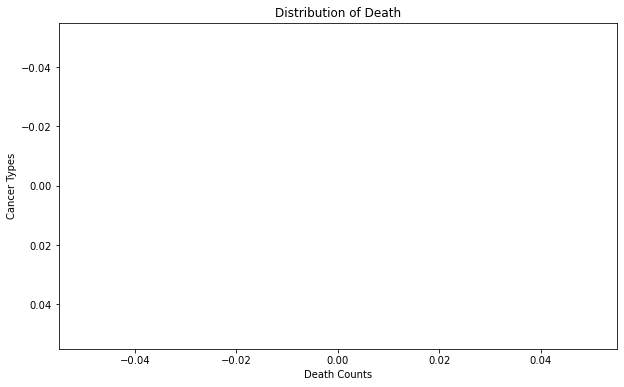

In [177]:


# Extract the data for the plot
sites = top_10_sites['SITE_ICD10_O2_3CHAR']
counts = top_10_sites['UNIQUE_SITE_COUNT']

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))  
bars = plt.barh(sites, counts, color='grey')

# Add labels and title
plt.xlabel('Death Counts')
plt.ylabel('Cancer Types')
plt.title('Distribution of Death')

# Invert the y-axis to display the highest count at the top
plt.gca().invert_yaxis()

# Add annotations to the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_width() + 1000, bar.get_y() + bar.get_height() / 2, f'{int(count):,}', ha='center', va='center')

# Show the plot
plt.show()



In [178]:
#FOR CANCER SURVIVORS


valid_statuses_alive = ['A', 'A1', 'A2', 'A3']
filtered_cancer_vital_alive = cancer_vital[cancer_vital['VITALSTATUS'].isin(valid_statuses_alive)]


In [179]:
filtered_cancer_vital_alive['VITALSTATUS'].value_counts()

Series([], Name: VITALSTATUS, dtype: int64)

In [180]:

# Create a new column 'UNIQUE_SITE_COUNT' with the counts of unique values
filtered_cancer_vital_alive['UNIQUE_SITE_COUNT'] = filtered_cancer_vital_alive.groupby('SITE_ICD10_O2_3CHAR')['SITE_ICD10_O2_3CHAR'].transform('count')


In [181]:
filtered_cancer_vital_alive

,SITE_ICD10_O2_3CHAR,VITALSTATUS,UNIQUE_SITE_COUNT


In [182]:
unique_cancer = filtered_cancer_vital_alive.drop_duplicates(subset='SITE_ICD10_O2_3CHAR')

In [183]:
unique_cancer

,SITE_ICD10_O2_3CHAR,VITALSTATUS,UNIQUE_SITE_COUNT


In [184]:


# Sort the DataFrame by 'UNIQUE_SITE_COUNT' in descending order
sorted_unique_cancer = unique_cancer.sort_values(by='UNIQUE_SITE_COUNT', ascending=False)

# Select the top 10 values in 'SITE_ICD10_O2_3CHAR' based on 'UNIQUE_SITE_COUNT'
top10_cancer = sorted_unique_cancer.head(10)




In [185]:
top10_cancer

,SITE_ICD10_O2_3CHAR,VITALSTATUS,UNIQUE_SITE_COUNT


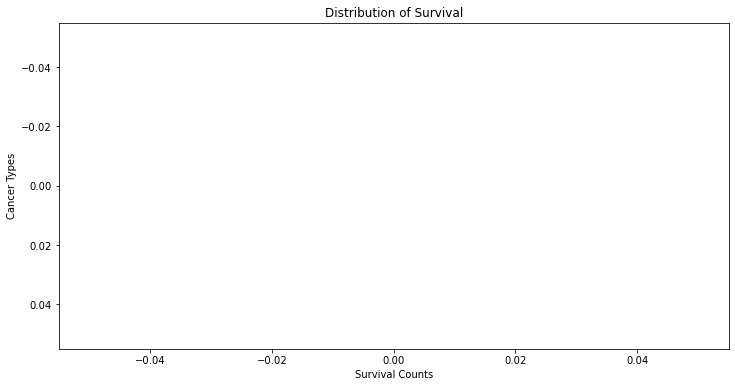

In [186]:


# Extract the data for the plot
sites = top10_cancer['SITE_ICD10_O2_3CHAR']
counts = top10_cancer['UNIQUE_SITE_COUNT']

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
bars = plt.barh(sites, counts, color='orange')

# Add labels and title
plt.xlabel('Survival Counts')
plt.ylabel('Cancer Types')
plt.title('Distribution of Survival')

# Invert the y-axis to display the highest count at the top
plt.gca().invert_yaxis()

# Add annotations to the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_width() + 1000, bar.get_y() + bar.get_height() / 2, f'{int(count):,}', ha='center', va='center')

# Show the plot
plt.show()



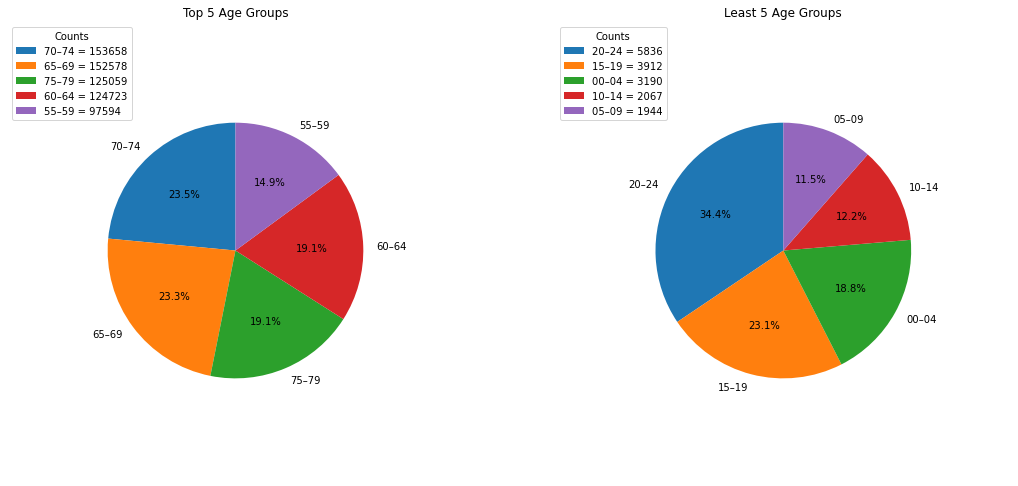

In [187]:
#Pie chart for different age groups
# FOR UK

# Create a dictionary with the age group data generated from the value counts in tumour dataset.
data = {
    'Age Group (years)': [
        '00–04', '05–09', '10–14', '15–19', '20–24', '25–29', '30–34', '35–39', '40–44', '45–49',
        '50–54', '55–59', '60–64', '65–69', '70–74', '75–79', '80–84', '85–89', '90+'
    ],
    'Count': [
        3190, 1944, 2067, 3912, 5836, 9367, 15327, 20141, 29822, 47893, 68848,
        97594, 124723, 152578, 153658, 125059, 97364, 66657, 36296
    ]
}

# Create a DataFrame
age_df = pd.DataFrame(data)

# Sort the DataFrame by Count in descending order
age_df = age_df.sort_values(by='Count', ascending=False)

# Create two DataFrames for the top 5 and least 5 age groups
top_5 = age_df.head(5)
least_5 = age_df.tail(5)

# Create subplots for the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# Pie chart for top 5 age groups with a smaller radius
ax1.pie(top_5['Count'], labels=top_5['Age Group (years)'], autopct='%1.1f%%', startangle=90, radius=0.7)
ax1.set_title('Top 5 Age Groups')

# Create a legend for the top 5 age groups
legend_labels_top = [f"{row['Age Group (years)']} = {row['Count']}" for _, row in top_5.iterrows()]
ax1.legend(legend_labels_top, title="Counts", loc="upper left")

# Pie chart for least 5 age groups with a smaller radius
ax2.pie(least_5['Count'], labels=least_5['Age Group (years)'], autopct='%1.1f%%', startangle=90, radius=0.7)
ax2.set_title('Least 5 Age Groups')

# Create a legend for the least 5 age groups
legend_labels_least = [f"{row['Age Group (years)']} = {row['Count']}" for _, row in least_5.iterrows()]
ax2.legend(legend_labels_least, title="Counts", loc="upper left")

# Display the pie charts
plt.show()


In [188]:
aus_data

,Data type,Cancer group/site,Year,Sex,Age group (years),Count,"Age-specific rate\n(per 100,000)","Age-standardised rate\n(Aust.) (per 100,000)","Age-standardised rate\n (WHO) (per 100,000)","Age-standardised rate\n (Segi) (per 100,000)",Unnamed: 10,ICD10 codes
680,Actual,Acute lymphoblastic leukaemia,2016,Males,00–04,56,6.9,. .,. .,. .,,C91.0
681,Actual,Acute lymphoblastic leukaemia,2016,Males,05–09,30,3.7,. .,. .,. .,,C91.0
682,Actual,Acute lymphoblastic leukaemia,2016,Males,10–14,15,2.0,. .,. .,. .,,C91.0
683,Actual,Acute lymphoblastic leukaemia,2016,Males,15–19,21,2.8,. .,. .,. .,,C91.0
684,Actual,Acute lymphoblastic leukaemia,2016,Males,20–24,6,0.7,. .,. .,. .,,C91.0
...,...,...,...,...,...,...,...,...,...,...,...,...
207094,Actual,Vulvar cancer,2018,Females,70–74,37,7.1,. .,. .,. .,,C51
207095,Actual,Vulvar cancer,2018,Females,75–79,53,14.5,. .,. .,. .,,C51
207096,Actual,Vulvar cancer,2018,Females,80–84,37,13.8,. .,. .,. .,,C51
207097,Actual,Vulvar cancer,2018,Females,85–89,26,14.2,. .,. .,. .,,C51


In [189]:
aus_data['Year'].value_counts()

2016    3268
2017    3268
2018    3268
Name: Year, dtype: int64

In [190]:
aus_cancer_df =pd.read_excel("Data/CDiA-2022-Book-1a-Cancer-incidence-age-standardised-rates-5-year-age-groups.xlsx"
                       ,sheet_name="Table S1a.1",header=5,skipfooter=19)
aus_cancer_df

,Data type,Cancer group/site,Year,Sex,Age group (years),Count,"Age-specific rate\n(per 100,000)","Age-standardised rate\n(Aust.) (per 100,000)","Age-standardised rate\n (WHO) (per 100,000)","Age-standardised rate\n (Segi) (per 100,000)",Unnamed: 10,ICD10 codes
0,Actual,Acute lymphoblastic leukaemia,1982,Males,00–04,42,7.1,. .,. .,. .,,C91.0
1,Actual,Acute lymphoblastic leukaemia,1982,Males,05–09,25,4.0,. .,. .,. .,,C91.0
2,Actual,Acute lymphoblastic leukaemia,1982,Males,10–14,14,2.0,. .,. .,. .,,C91.0
3,Actual,Acute lymphoblastic leukaemia,1982,Males,15–19,14,2.1,. .,. .,. .,,C91.0
4,Actual,Acute lymphoblastic leukaemia,1982,Males,20–24,5,0.7,. .,. .,. .,,C91.0
...,...,...,...,...,...,...,...,...,...,...,...,...
207995,Projections,Vulvar cancer,2022,Persons,75–79,45,5.1,. .,. .,. .,,C51
207996,Projections,Vulvar cancer,2022,Persons,80–84,52,9.1,. .,. .,. .,,C51
207997,Projections,Vulvar cancer,2022,Persons,85–89,46,13.6,. .,. .,. .,,C51
207998,Projections,Vulvar cancer,2022,Persons,90+,27,12.2,. .,. .,. .,,C51


In [191]:
# Filter aus_cancer_age_year for years 2019 to 2022
aus_filtered_df = aus_cancer_df[(aus_cancer_df['Year'] >= 2016) & (aus_cancer_df['Year'] <= 2019)]
aus_filtered_df

,Data type,Cancer group/site,Year,Sex,Age group (years),Count,"Age-specific rate\n(per 100,000)","Age-standardised rate\n(Aust.) (per 100,000)","Age-standardised rate\n (WHO) (per 100,000)","Age-standardised rate\n (Segi) (per 100,000)",Unnamed: 10,ICD10 codes
680,Actual,Acute lymphoblastic leukaemia,2016,Males,00–04,56,6.9,. .,. .,. .,,C91.0
681,Actual,Acute lymphoblastic leukaemia,2016,Males,05–09,30,3.7,. .,. .,. .,,C91.0
682,Actual,Acute lymphoblastic leukaemia,2016,Males,10–14,15,2.0,. .,. .,. .,,C91.0
683,Actual,Acute lymphoblastic leukaemia,2016,Males,15–19,21,2.8,. .,. .,. .,,C91.0
684,Actual,Acute lymphoblastic leukaemia,2016,Males,20–24,6,0.7,. .,. .,. .,,C91.0
...,...,...,...,...,...,...,...,...,...,...,...,...
207935,Projections,Vulvar cancer,2019,Persons,75–79,41,5.6,. .,. .,. .,,C51
207936,Projections,Vulvar cancer,2019,Persons,80–84,44,8.7,. .,. .,. .,,C51
207937,Projections,Vulvar cancer,2019,Persons,85–89,41,13.1,. .,. .,. .,,C51
207938,Projections,Vulvar cancer,2019,Persons,90+,25,12.4,. .,. .,. .,,C51


In [192]:
aus_age_df = aus_filtered_df[['Age group (years)','Count']]
aus_age_df

,Age group (years),Count
680,00–04,56
681,05–09,30
682,10–14,15
683,15–19,21
684,20–24,6
...,...,...
207935,75–79,41
207936,80–84,44
207937,85–89,41
207938,90+,25


In [193]:
# Group the data by "Age group (years)" and sum the counts within each group
aggregated_df = aus_age_df.groupby("Age group (years)")["Count"].sum().reset_index()


aggregated_df

,Age group (years),Count
0,00–04,8517
1,05–09,5268
2,10–14,5642
3,15–19,10514
4,20–24,15760
5,25–29,25175
6,30–34,41300
7,35–39,54559
8,40–44,79652
9,45–49,128385


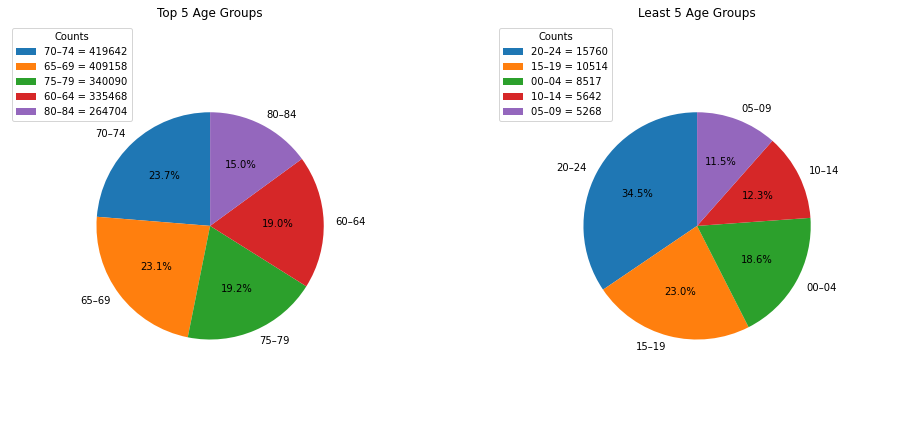

In [194]:
# Create a dictionary with the age group data
data = {
    'Age Group (years)': [
        '00–04', '05–09', '10–14', '15–19', '20–24', '25–29', '30–34', '35–39', '40–44', '45–49',
        '50–54', '55–59', '60–64', '65–69', '70–74', '75–79', '80–84', '85–89', '90+'
    ],
    'Count': [
        8517, 5268, 5642, 10514, 15760, 25175, 41300, 54559, 79652, 128385, 183592,
        261299, 335468, 409158, 419642, 340090, 264704, 178688, 98588
    ]
}

# Create a DataFrame
aus_df = pd.DataFrame(data)

# Sort the DataFrame by Count in descending order
aus_df = aus_df.sort_values(by='Count', ascending=False)

# Create two DataFrames for the top 5 and least 5 age groups
top_5 = aus_df.head(5)
least_5 = aus_df.tail(5)

# Create subplots for the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for top 5 age groups with a smaller radius
ax1.pie(top_5['Count'], labels=top_5['Age Group (years)'], autopct='%1.1f%%', startangle=90, radius=0.7)
ax1.set_title('Top 5 Age Groups')

# Create a legend for the top 5 age groups
legend_labels_top = [f"{row['Age Group (years)']} = {row['Count']}" for _, row in top_5.iterrows()]
ax1.legend(legend_labels_top, title="Counts", loc="upper left")

# Pie chart for least 5 age groups with a smaller radius
ax2.pie(least_5['Count'], labels=least_5['Age Group (years)'], autopct='%1.1f%%', startangle=90, radius=0.7)
ax2.set_title('Least 5 Age Groups')

# Create a legend for the least 5 age groups
legend_labels_least = [f"{row['Age Group (years)']} = {row['Count']}" for _, row in least_5.iterrows()]
ax2.legend(legend_labels_least, title="Counts", loc="upper left")

# Display the pie charts
plt.show()
